## 8. K-Means Clustering and Gaussian Mixture Model
$$\newcommand{\argmin}{\mathop{\mathrm{argmin}}\limits}$$
$$\newcommand{\argmax}{\mathop{\mathrm{argmax}}\limits}$$
Machine Learning의 기초적인 이론부분을 다시 제대로 잡고 싶어서 <a href="https://kaist.edwith.org/machinelearning2__17/joinLectures/9782">문일철 교수님의 인공지능 및 기계학습 개론</a>을 정리한 Post입니다.

- 8.1 K-Means Algorithm
- 8.2 Hierarchical Algorithm
- 8.3 Multinomial Distribution
- 8.4 Mutivariate Gaussian Distribution
- 8.5 Gaussian Mixture Model
- 8.6 EM step for Gaussian Mixture Model
- 8.7 Relation between K-means and GMM
- 8.8 Fundamentals of the EM Algorithm
- 8.9 Derivation of EM Algorithm

### 8.1 K-Means Algorithm

K-Means Clusturing은 분리형 군집화 알고리즘중 하나로서, **각 군집은 하나의 중심을 가지고 각 개체는 가장 가까운 중심에 할당되며, 같은 중심에 개체들이 모여 하나의 군집을 형성하는 방법이다.**  
이러한 방식은 사전에 군집 수(k)를 사용자가 지정해야하는 hyperparameter이다.  

<p>$$W(C) = \frac{1}{2} \sum_{k=1}^{K} \sum_{C(i)=C(j)=k} d_E (m_i,x_j)^2$$</p>
<p>$$d_{E}(a,b) = \sqrt{a^2+b^2}$$</p>

=> 같은 Cluster내에 있는 DataPoint끼리의 Euclidian Distance의 합이 최소가 되도록 Centeriod를 Update한다.

**학습 과정**  
**1. 클러스터 개수 K를 고정하고, t=0으로 초기화 한다. K 개의 클러스터( <span>$C^{0}_{i}, i=1, ..., K$</span>)의 평균(<span>$m^{0}_{i}, i=1, ..., K$</span>)을 임의로 선택한다.**  
<img src="http://i.imgur.com/hgNzXsc.png" width="500px" title="source: imgur.com"><br>

**2. 클러스터링하려는 데이터(<span>$x_{j}, j=1, ..., M$</span>)각각의 K개의 클러스터 평균과의 최소거리가 되는 클러스터(<span>$C^{t}_{p}$</span>)로 <span>$x_{j}$</span>를 분류**  
<img src="http://i.imgur.com/OFn22dM.png" width="500px" title="source: imgur.com"><br>

**3. 각 클러스터(<span>$C^{t}_{i}, i=1, ..., K$</span>)에 속한 데이터를 이용하여 새로운 클러스터 평균 <span>$m^{t+1}_{i}, i=1, ..., K$</span> 을 계산한다.**  
<p>$m^{t+1}_{i} = \frac{1}{C^{t}_{i}} \sum_{x \in C^{t}_{i}}x_{j}, i=1, ..., K$</p>
<img src="http://i.imgur.com/UmBgHhf.png" width="500px" title="source: imgur.com"><br>

**4. t = t+1로 증가시키고 최대 반복회수까지 2~3단계를 계속하여 반복한다.**  
**2단계 반복**  
<img src="http://i.imgur.com/DWmbUxP.png" width="500px" title="source: imgur.com"><br>
**3단계 반복**  
<img src="http://i.imgur.com/OBhtsbV.png" width="500px" title="source: imgur.com">
<br>

**장점 및 단점**  
장점: 
 - 계산 복잡성이 O(n)이여서 가벼운 편이다.
 - 알고리즘이 쉽다.
 
단점:  
 - 군집의 크기가 다를 경우 제대로 작동하지 않을 수 있다.
<img src="http://i.imgur.com/IH8FAfq.png" width="500px" title="source: imgur.com">
 - 군집의 밀도가 다를 경우 제대로 작동하지 않을 수 있다.
<img src="http://i.imgur.com/pJmhpQ6.png" width="500px" title="source: imgur.com">
 - 데이터 분포가 특이한 케이스인 경우 제대로 작동하지 않을 수 있다.
<img src="http://i.imgur.com/v37p0Gi.png" width="500px" title="source: imgur.com">

- 군집 수(k)를 사용자가 미리 지정해야 한다.
- Outlier에 Robust하지 않다.(K-Medoids를 사용하면 해결 가능하나 Complexity가 증가되어서 사용되지 않는다.)
- Hard Clustering 이다. Cluster에 속하냐 안하냐로서만 표현하지, Probability로서 표현되지는 않는다.

그림 출처: https://ratsgo.github.io/machine%20learning/2017/04/19/KC/
<br>

**참조**  
1. K-Means Algorithm은 EM Algorithm이다. Cluster에 속하는지에 대한 <span>$C$</span>를 Expected -> Cluster의 평균 Centriod(<span>$m_i$</span>)를 Update한다는 의미이다.
2. EM Algorithm이므로 Local Minimum에 빠질 가능성이 있다. 따라서 Centriod의 위치를 바꿔가면서 수행하여야 한다.

### 8.2 Hierarchical Algorithm
**K-Means와 달리 K개의 Cluster의 개수를 지정하지 않고 Dendrogram Structure로서 Cluster하는 방식이다.**  

장점:
 - Cluster의 개수를 지정하지 않는다.
 - Cluster끼리의 관계 파악 가능

단점:
 - Post-Processing: 결국 Dendrogram Structure에서 Cluster로서 나누기 위해 Cut하여 나누어야 됨(사용자가 직접 지정 or Dynamic Cut(R) 패키지 사용)
 - 하나의 Cluster로서 결정되면 바뀌지 않는다.
 - Complexity가 K-Means(O(n))에 비하여 O(n^3)로서 무거운 편 이다.
 
Hierarchical Clustering은 크게 2가지로서 나누어 진다.  
- Agglomerative Hierarchical Clustering: Bottom-up Algorithm
- Divisive Hierarchical Clustering: Top-Down Algorithm

위와 같이 크게 2가지의 Hierarchical Clustering방법에서 Cluster끼리의 거리를 계산하기 위하여 공통적으로 사용하는 방법은 다음과 같다.  

Cluster Distance 측정 방법(위의 2가지 방법 둘다 공통으로 사용)  
- Single Linkage: Cluster안에서의 Point끼리 가장 가까운 거리를 측정(Smallest Distance)
- Complete Linkage: Cluster안에서의 Point끼리 가장 먼 거리를 측정(Largest Distance)
- Centroid Linkage: Cluster안에서의 Point끼리 중심 거리를 측정(Distance Between two Centroids)
- Average Linkage: Cluster안에서의 Point끼리 거리의 평균을 측정(Average Distance)

<img src="http://i.imgur.com/TM1PuQc.png" width="600px" title="source: imgur.com">

**학습 방법**  
Bottom Up 방식(Agglomerative Hierarchical Clustering)으로 예시를 들면 다음과 같다.  

1. Cluster끼리의 거리 계산(Euclidian Distance or Correlation Distance, 위의 4가지 방법 중 하나를 선택)를 계산하여 Matrix형태로서 나타낸다.  
<img src="http://i.imgur.com/25IT5fI.png" width="500px" title="source: imgur.com"><br>

2. 가장 가까운 거리의 Point들을 하나의 Cluster로서 지정한다.
<img src="http://i.imgur.com/iuZm5wl.png" width="500px" title="source: imgur.com">

3. 다시 Cluster의 거리를 끼리 거기를 계산하고 1~2의 방법을 계속하여 수행한다.
<img src="http://i.imgur.com/1OI9j9S.png" width="500px" title="source: imgur.com">

4. 최종적으로 Cluster가 1개가 되었을 때(Root Cluster를 구하였을 때) 학습을 종료한다.
<img src="http://i.imgur.com/S18WtII.png" width="500px" title="source: imgur.com">

5. 위와 같은 최종적인 Dendrogram Structure에서 사용자가 어떤 Cluster로 분류할 지 정하여 Cut(Post-Processing) 한다. Ex) 만약 두번째 층에서 끝게 되면 -> (A,D), C, B로서 3개의 Cluster로서 분할이 가능하다.

그림 출처: https://ratsgo.github.io/machine%20learning/2017/04/18/HC/

### 8.3 Multinomial Distribution
- Selecting 0 or 1 => Binomial Distribution
- Selecting 0 or 1 or .... or M => Multinomial Distribution

주사위 던지기 예제에 적용하여 생각해 보자.  
- x: 선택지 ex) 주사위한번 던졌을 경우 숫자가 나온 개수(0,0,1,0,0,0)
- <span>$\mu$</span>: 확률 ex) 주사위의 각각의 숫자가 나올 확률

<p>$$\sum_{k}x_k = 1, P(X|\mu) = \prod_{k=1}^{K} \mu_k^{x_k}, \mu_k \ge 0, \sum_{k}\mu_{k}=1$$</p>

위의 식을 살펴보게 되면 Binormial Distribution의 General한 Version인 것을 확인할 수 있다.  
주사위의 6가지 경우의 수가 아닌 실제 Dataset에 적용시키면 다음과 같이 식을 변형할 수 있다.  
- D: Dataset with N selections => <span>$x_1, ..., x_n$</span>

<p>$$P(X|\mu) = \prod_{n=1}^{N} \prod_{k=1}^{K} \mu_k^{x_{nk}} = \prod_{k=1}^{K} \mu_k^{\sum_{n=1}^{N} x_{nk}} = \prod_{k=1}^{K} \mu_k^{m_k}$$</p>

ex) 주사위를 25번 던졌다.
- x: x1, x2, ..., x25
- k: 1,2,3,4,5,6
- <span>$\mu$</span>: 1/6, 1/6, 1/6, 1/6, 1/6, 1/6

**MLE of Multinormial Distribution**  
**Multinormial Distribution의 확률을 구할 수 있으므로, 이 확률의 MLE는 다음과 같이 나타낼 수 있다.**  

<p>$$\text{Maximize} P(X|\mu) = \prod_{k=1}^{K} \mu_{k}^{m_k}$$</p>
<p>$$\text{Subject to} \mu_k \ge 0, \sum_{k} \mu_k = 1$$</p>

어떠한 Function을 Maximize하는데 제약조건이 있으므로 <a href="">5. SVM</a>과 같이 Largrange Method로서 해결한다.  

<p>$$L(\mu, m, \lambda) = \sum_{k}m_k ln(\mu_k) + \lambda(\sum_{k}\mu_k -1)$$</p>
<p>$$\frac{d}{d \mu_k}L(\mu, m, \lambda) = \frac{m_k}{\mu_k} + \lambda =0 \rightarrow \mu_k = -\frac{m_k}{\lambda}$$</p>
<p>$$\sum_{k} \mu_k =1 \rightarrow -\sum_{k}\frac{m_k}{\lambda} = 1 \rightarrow \sum_{k} m_k = -\lambda \rightarrow \sum_{k}\sum_{n}x_{nk} = N$$</p>
<p>$$\therefore -\lambda = N \rightarrow \mu_{k} = \frac{m_k}{N}$$</p>

**MLD of Multinormial Distribution은 <a href="">MLE of Bionomial Distribution</a>(<span>$\hat{\theta} = \frac{\alpha_H}{\alpha_H+\alpha_T}$</span>)와 형태가 같은 <span>$\frac{\text{해당 횟수}}{\text{전체 횟수}}$</span>라는 것을 확인할 수 있다.**

### 8.4 Multivariate Gaussian Distribution
먼저 Gaussian Distribution의 식을 다시한번 생각해보면 다음과 같이 나타낼 수 있다.  
<p>$$N(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$$</p>

위와 같은 식은 <span>$\mu, \sigma$</span>가 각각의 1개의 값을 가지는 단순한 Gaussian Distribution이다.  

위의 식을 활용하여 **Multivariabe Gaussian Distribution을 나타내면 다음과 같이 나타낼 수 있다.**  

<p>$$N(x|\mu,\boldsymbol{\Sigma}) = \frac{1}{2\pi^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T \boldsymbol{\Sigma}^{-1}(x-\mu))$$</p>

<span>$\mu, \boldsymbol{\Sigma}$</span>이 더이상 단일 값이 아니라 Dimension의 개수만큼 가져야 하므로, Matrix로서 표현하게 되어서 식이 변하게 되었다.  
<span>$\boldsymbol{\Sigma}$</span>은 Covariance Matrix로서 표현된다.  

실제 잘 감이 안잡히므로 Multivariate Gaussian Distribution을 Visualization하면 다음과 같다.  

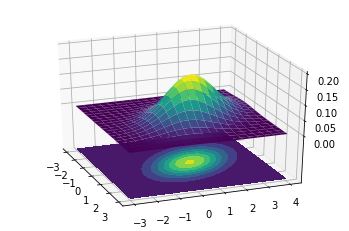

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

**Mixture Model**  
이러한 Gaussian Mixture Model을 사용해야 하는 이유를 생각하면 다음과 같다.  
현재 다음과 같은 Data Distribution이 있다고 하자.  
<img src="https://k.kakaocdn.net/dn/S2IZq/btqyLeyRDda/p84gvI1FtQMBTbwv8AW9p0/img.png" ><br>

위와 같은 상황인 경우 Gaussian Distribution으로서 Data Distribution을 예측하면 다음과 같다.  

<img src="https://k.kakaocdn.net/dn/dANqO7/btqyLelrgAt/ySZs0TTzQop3mYQ0KkSFEk/img.png" ><br>

잘 Fitting이 되지 않는다고 할 수 있다.  
**즉, Multivariabe Gaussian Distribution로서 여러개의 평균과 분산으로서 Gaussian Distribution여러개를 사용하여 Data Distribution을 Prediction하면 다음과 같은 형태가 된다.**  

<img src="https://k.kakaocdn.net/dn/1za9z/btqyK9xPEdn/r95j1m5kzamn2f6RrRffok/img.png" ><br>

위와 같은 이유로서 GMM(Gaussian Mixture Model)을 사용하는 것 이다.  

이러한 GMM을 식으로서 표현하면 다음과 같다.  
<p>$$P(x) = \sum_{k=1}^{K} \pi_{k} N(x|\mu_k,\sigma_k)$$</p>
<p>$$\sum_{k=1}^{K}\pi_k =1,  0 \le \pi_k \le 1$$</p>

**중요하게 봐야하는 점은 <span>$\pi_k$</span>은 K개의 Gaussian Distribution에서 각각의 Gaussian Distribution의 속할 확률로서 0~1 사이의 값을 가지게 된다. 이는 K-Means의 Hard Clustering(Cluster에 속하냐 안하냐로서만 표현- 0 or 1)이 아닌, Soft Clustering으로서 표현된다는 것 이다.**

**참조(Covariance Matrix)**  
Covariance Matrix는 정말 많이 사용되는 Matrix의 종류 중 하나이므로 꼭 이해하고 넘어가야 한다.  

각각의 Element에 관하여 Covariance 관계를 나타낸 Matrix이고 수학적인 수식으로 나타내면 다음과 같다.  
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/595ae6dc8ee7f0708dbf854a48a8c6bfad7ff8ce" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -11.671ex; width:112.636ex; height:24.509ex;" alt="{\displaystyle \operatorname {K} _{\mathbf {X} \mathbf {X} }={\begin{bmatrix}\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{1}-\operatorname {E} [X_{1}])]&amp;\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{2}-\operatorname {E} [X_{2}])]&amp;\cdots &amp;\mathrm {E} [(X_{1}-\operatorname {E} [X_{1}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{1}-\operatorname {E} [X_{1}])]&amp;\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{2}-\operatorname {E} [X_{2}])]&amp;\cdots &amp;\mathrm {E} [(X_{2}-\operatorname {E} [X_{2}])(X_{n}-\operatorname {E} [X_{n}])]\\\\\vdots &amp;\vdots &amp;\ddots &amp;\vdots \\\\\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{1}-\operatorname {E} [X_{1}])]&amp;\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{2}-\operatorname {E} [X_{2}])]&amp;\cdots &amp;\mathrm {E} [(X_{n}-\operatorname {E} [X_{n}])(X_{n}-\operatorname {E} [X_{n}])]\end{bmatrix}}}">

위의 **Covariance Matrix에서 주요하게 봐야하는 점은 4가지 이다.**
1. Covariance Matrix는 Symmentric Matrix 이다.
2. Covariane Matrix의 Diagonal은 각각의 Element의 Variance을 의미한다.
3. Covariance Matrix의 Diagonal을 제외한 각각의 Element는 두개의 Element끼리의 Covariance를 의미한다.

Covariance Matrix를 좀 직관적으로 살피기 위하여 2차원이라고 한정하고 몇개의 예시를 살펴보면 다음과 같다.  

![png](./images/24.png)<br>

위의 그림을 왼쪽 위부터 살펴보면 다음과 같다.
1. Varaince와 Covariance가 각각 1이다. 즉, x축으로의 분산, y축으로의 분산이 각각 1이고, Correlation값을 계산항여도 1이니, y=x와 같은 형태로서 나타내게 된다.
2. Variance와 Covariance가 각각 0 이다. 즉, x축,y축으로의 분산이 없는 상태이므로 하나의 Point로서 나오게 된다.
3. x축으로만 분산이 있는 상황이다. 즉, 2차원에서 x축으로만 값이 존재하는 형태로서 표현된다.
4. x,y축으로의 분산만 존재하는 상황이다. Covariance가 0이므로 원의 형태로서 나오게 된다.
5. x축의 분산이 y축의 분산보다 큰 상황이다. 즉 타원형태이지만 x축의 길이가 더 길다.
6. 5와 형태가 같다.
7. 1의 형태에서 분산만 두배로 커진다.
8. 7의 형태에서 Covariance의 부호만 바뀌게 된다. => Correlation의 방향이 반대이다.

위와 같은 Covariance의 특징을 통하여 SVD, PCA에서도 사용하게 된다.  
이전 Post <a href="https://wjddyd66.github.io/others/PCA/">SVD</a>의 식을 살펴보면 다음과 같다.  
<p>$$A = U \sum V^{T}$$</p>

위의 식을 다시한번 생각해보게 되면, **Orthogonal Matrix(U,V)로서 회전변환 하여 Covariance Matrix에서 Diagonal형태가 되도록 EigenVector를 설정한다. Eigen Vector에서 값이 적은 축을 제거 한다. => 위의 예시에서 3번인 경우 y축 제거**  

위와 같은 PCA를 그림으로 살펴보면 다음과 같다.  
<img src="https://miro.medium.com/max/499/0*l5-imeQ9RfmaVWtL">

사진 참조: https://medium.com/mighty-data-science-bootcamp/unsupervised-learning-pca-k-means-a95aa72bf27f

### 8.5 Gaussian Mixture Model
<p>$$P(x) = \sum_{k=1}^{K} \pi_{k} N(x|\mu_k,\sigma_k) = \sum_{k=1}^{K}P(z_k)P(x|z)$$</p>
<p>$$\sum_{k=1}^{K}\pi_k =1,  0 \le \pi_k \le 1$$</p>

- <span>$\pi_{k} = P(z_k)$</span>: 어떤 Cluster를 선택할 것 인가. **Mixing Coefficient**
- <span>$N(x|\mu_k,\sigma_k)=P(x|z)$</span>: Cluster의 Gaussian Distribution **Mixture Component**

Example) 실제 Data x가 들어왔을 때 어떤 Cluster에 Assign될 것인가?  
<p>$$\gamma(z_{nk}) = P(z_k=1|x_n) = \frac{P(z_k=1)P(x|z_k=1)}{\sum_{j=1}^{K}P(z_j=1)P(x|z_j = 1)}= \frac{\pi_k N(x|\mu_k,\boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K}\pi_j N(x|\mu_j \boldsymbol{\Sigma}_j)}$$</p>

위의 식은 매우 간단하다.  
MLE of Multiormial Distribution와 같이 <span>$\frac{해당 Cluser에 속할 확률}{전체 Cluster에 속할 확률}$</span>로서 표현하게 된다.

위의 식(Gaussian Mixture Model)을 Log Likelihood로서 표현하면 다음과 같이 나타낼 수 있다.  
<p>$$ln(P(X|\pi,\mu,\boldsymbol{\Sigma})) = \sum_{n=1}^{N}ln[\sum_{k=1}^{K} \pi_k N(x|\mu_k,\boldsymbol{\Sigma}_k)]$$</p>

### 8.6 EM step for Gaussian Mixture Model
먼저 EM Algorithm을 적용하기 위해서는 Multivariate Gaussian Distribution의 MLE를 알아야 한다.  

해당 과정은 <a href="https://stats.stackexchange.com/questions/351549/maximum-likelihood-estimators-multivariate-gaussian">StackExchange</a>에 잘 나와있어서 가져왔다.  

<div class="post-text" itemprop="text">
<h3>Deriving the Maximum Likelihood Estimators</h3>

<p>Assume that we have <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>m</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-125" style="width: 1.096em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.877em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.88em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-126"><span class="mi" id="MathJax-Span-127" style="font-family: MathJax_Math-italic;">m</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.67em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>m</mi></math></span></span><script type="math/tex" id="MathJax-Element-13">m</script> random vectors, each of size <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-128" style="width: 0.604em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.495em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.5em, 2.571em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-129"><span class="mi" id="MathJax-Span-130" style="font-family: MathJax_Math-italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 0.937em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-14">p</script>: <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mn mathvariant=&quot;bold&quot;>1</mn><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>,</mo><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mn mathvariant=&quot;bold&quot;>2</mn><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>,</mo><mo mathvariant=&quot;bold&quot;>.</mo><mo mathvariant=&quot;bold&quot;>.</mo><mo mathvariant=&quot;bold&quot;>.</mo><mo mathvariant=&quot;bold&quot;>,</mo><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>m</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-131" style="width: 11.096em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.074em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.15em, 1009.07em, 2.571em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-132"><span class="texatom" id="MathJax-Span-133"><span class="mrow" id="MathJax-Span-134"><span class="msubsup" id="MathJax-Span-135"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-136" style="font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.877em;"><span class="texatom" id="MathJax-Span-137"><span class="mrow" id="MathJax-Span-138"><span class="mo" id="MathJax-Span-139" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mn" id="MathJax-Span-140" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span><span class="mo" id="MathJax-Span-141" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-142" style="font-family: MathJax_Main-bold;">,</span><span class="msubsup" id="MathJax-Span-143" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-144" style="font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.877em;"><span class="texatom" id="MathJax-Span-145"><span class="mrow" id="MathJax-Span-146"><span class="mo" id="MathJax-Span-147" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mn" id="MathJax-Span-148" style="font-size: 70.7%; font-family: MathJax_Main-bold;">2</span><span class="mo" id="MathJax-Span-149" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-150" style="font-family: MathJax_Main-bold;">,</span><span class="mo" id="MathJax-Span-151" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-152" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-153" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-154" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">,</span><span class="msubsup" id="MathJax-Span-155" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 2.243em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-156" style="font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.877em;"><span class="texatom" id="MathJax-Span-157"><span class="mrow" id="MathJax-Span-158"><span class="mo" id="MathJax-Span-159" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-160" style="font-size: 70.7%; font-family: MathJax_Main-bold;">m</span><span class="mo" id="MathJax-Span-161" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 1.47em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mn mathvariant="bold">1</mn><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">,</mo><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mn mathvariant="bold">2</mn><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">,</mo><mo mathvariant="bold">.</mo><mo mathvariant="bold">.</mo><mo mathvariant="bold">.</mo><mo mathvariant="bold">,</mo><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">m</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow></math></span></span><script type="math/tex" id="MathJax-Element-15">\mathbf{X^{(1)}, X^{(2)},...,X^{(m)}}</script> where each random vectors can be interpreted as an observation (data point) across <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-162" style="width: 0.604em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.495em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.5em, 2.571em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-163"><span class="mi" id="MathJax-Span-164" style="font-family: MathJax_Math-italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 0.937em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-16">p</script> variables. If each <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;bold&quot;>X</mi></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>(</mo><mi>i</mi><mo stretchy=&quot;false&quot;>)</mo></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-165" style="width: 2.134em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.751em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.096em, 1001.75em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-166"><span class="msubsup" id="MathJax-Span-167"><span style="display: inline-block; position: relative; width: 1.751em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-168"><span class="mrow" id="MathJax-Span-169"><span class="mi" id="MathJax-Span-170" style="font-family: MathJax_Main-bold;">X</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.877em;"><span class="texatom" id="MathJax-Span-171"><span class="mrow" id="MathJax-Span-172"><span class="mo" id="MathJax-Span-173" style="font-size: 70.7%; font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-174" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-175" style="font-size: 70.7%; font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.27em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="bold">X</mi></mrow><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">(</mo><mi>i</mi><mo stretchy="false">)</mo></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-17">\mathbf{X}^{(i)}</script> are i.i.d. as multivariate Gaussian vectors: </p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo>&amp;#x223C;</mo><msub><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi class=&quot;MJX-tex-caligraphic&quot; mathvariant=&quot;script&quot;>N</mi></mrow><mi>p</mi></msub><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BC;</mi><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-176" style="width: 8.473em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.943em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.096em, 1006.83em, 2.626em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-177"><span class="texatom" id="MathJax-Span-178"><span class="mrow" id="MathJax-Span-179"><span class="msubsup" id="MathJax-Span-180"><span style="display: inline-block; position: relative; width: 1.806em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-181" style="font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.877em;"><span class="texatom" id="MathJax-Span-182"><span class="mrow" id="MathJax-Span-183"><span class="mo" id="MathJax-Span-184" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-185" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-186" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-187" style="font-family: MathJax_Main; padding-left: 0.276em;">∼</span><span class="msubsup" id="MathJax-Span-188" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.26em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.99em, 4.21em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-189"><span class="mrow" id="MathJax-Span-190"><span class="mi" id="MathJax-Span-191" style="font-family: MathJax_Caligraphic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.167em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -3.822em; left: 0.822em;"><span class="mi" id="MathJax-Span-192" style="font-size: 70.7%; font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-193" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-194" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-195" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-196" style="font-family: MathJax_Main; padding-left: 0.167em;">Σ</span><span class="mo" id="MathJax-Span-197" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.397em; border-left: 0px solid; width: 0px; height: 1.67em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo>∼</mo><msub><mrow class="MJX-TeXAtom-ORD"><mi class="MJX-tex-caligraphic" mathvariant="script">N</mi></mrow><mi>p</mi></msub><mo stretchy="false">(</mo><mi>μ</mi><mo>,</mo><mi mathvariant="normal">Σ</mi><mo stretchy="false">)</mo></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-18"> \mathbf{X^{(i)}} \sim \mathcal{N}_p(\mu, \Sigma) </script></p>

<p>Where the parameters <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03BC;</mi><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-198" style="width: 2.134em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.751em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.369em, 1001.7em, 2.571em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-199"><span class="mi" id="MathJax-Span-200" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-201" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-202" style="font-family: MathJax_Main; padding-left: 0.167em;">Σ</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 1.203em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>μ</mi><mo>,</mo><mi mathvariant="normal">Σ</mi></math></span></span><script type="math/tex" id="MathJax-Element-19">\mu, \Sigma</script> are unknown. To obtain their estimate we can use the method of maximum likelihood and maximize the log likelihood function. </p>

<p>Note that by the independence of the random vectors, the joint density of the data <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-20-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>{</mo><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo>,</mo><mi>i</mi><mo>=</mo><mn>1</mn><mo>,</mo><mn>2</mn><mo>,</mo><mo>.</mo><mo>.</mo><mo>.</mo><mo>,</mo><mi>m</mi><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>}</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-203" style="width: 11.533em; display: inline-block;"><span style="display: inline-block; position: relative; width: 9.456em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.15em, 1009.4em, 2.626em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-204"><span class="texatom" id="MathJax-Span-205"><span class="mrow" id="MathJax-Span-206"><span class="mo" id="MathJax-Span-207" style="font-family: MathJax_Main;">{</span><span class="msubsup" id="MathJax-Span-208"><span style="display: inline-block; position: relative; width: 1.806em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.82em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-209" style="font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.877em;"><span class="texatom" id="MathJax-Span-210"><span class="mrow" id="MathJax-Span-211"><span class="mo" id="MathJax-Span-212" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-213" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-214" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-215" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-216" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">i</span><span class="mo" id="MathJax-Span-217" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mn" id="MathJax-Span-218" style="font-family: MathJax_Main; padding-left: 0.276em;">1</span><span class="mo" id="MathJax-Span-219" style="font-family: MathJax_Main;">,</span><span class="mn" id="MathJax-Span-220" style="font-family: MathJax_Main; padding-left: 0.167em;">2</span><span class="mo" id="MathJax-Span-221" style="font-family: MathJax_Main;">,</span><span class="mo" id="MathJax-Span-222" style="font-family: MathJax_Main; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-223" style="font-family: MathJax_Main; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-224" style="font-family: MathJax_Main; padding-left: 0.167em;">.</span><span class="mo" id="MathJax-Span-225" style="font-family: MathJax_Main; padding-left: 0.167em;">,</span><span class="mi" id="MathJax-Span-226" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">m</span><span class="mo" id="MathJax-Span-227" style="font-family: MathJax_Main;">}</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.397em; border-left: 0px solid; width: 0px; height: 1.537em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mo fence="false" stretchy="false">{</mo><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo>,</mo><mi>i</mi><mo>=</mo><mn>1</mn><mo>,</mo><mn>2</mn><mo>,</mo><mo>.</mo><mo>.</mo><mo>.</mo><mo>,</mo><mi>m</mi><mo fence="false" stretchy="false">}</mo></math></span></span><script type="math/tex" id="MathJax-Element-20">\mathbf{ \{X^{(i)}}, i = 1,2,...,m\}</script> is the product of the individual densities, that is <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-21-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><munderover><mo>&amp;#x220F;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msub><mi>f</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow></mrow></msub><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi></mrow><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-228" style="width: 10.877em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.91em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.15em, 1008.8em, 2.68em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-229"><span class="munderover" id="MathJax-Span-230"><span style="display: inline-block; position: relative; width: 2.189em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.88em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-231" style="font-family: MathJax_Size1; vertical-align: 0em;">∏</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.5em, 1000.71em, 4.156em, -999.997em); top: -4.478em; left: 0.932em;"><span class="mi" id="MathJax-Span-232" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.21em, 4.156em, -999.997em); top: -3.713em; left: 0.932em;"><span class="texatom" id="MathJax-Span-233"><span class="mrow" id="MathJax-Span-234"><span class="mi" id="MathJax-Span-235" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-236" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-237" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-238" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.861em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.374em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-239" style="font-family: MathJax_Math-italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -3.658em; left: 0.495em;"><span class="texatom" id="MathJax-Span-240"><span class="mrow" id="MathJax-Span-241"><span class="texatom" id="MathJax-Span-242"><span class="mrow" id="MathJax-Span-243"><span class="msubsup" id="MathJax-Span-244"><span style="display: inline-block; position: relative; width: 1.26em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-245" style="font-size: 70.7%; font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.26em; left: 0.604em;"><span class="texatom" id="MathJax-Span-246"><span class="mrow" id="MathJax-Span-247"><span class="mo" id="MathJax-Span-248" style="font-size: 50%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-249" style="font-size: 50%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-250" style="font-size: 50%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-251" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-252"><span class="mrow" id="MathJax-Span-253"><span class="msubsup" id="MathJax-Span-254"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-255" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.604em;"><span class="texatom" id="MathJax-Span-256"><span class="mrow" id="MathJax-Span-257"><span class="mo" id="MathJax-Span-258" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-259" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-260" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-261" style="font-family: MathJax_Main-bold;">;</span><span class="mi" id="MathJax-Span-262" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">μ</span><span class="mo" id="MathJax-Span-263" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-264" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span></span></span><span class="mo" id="MathJax-Span-265" style="font-family: MathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.463em; border-left: 0px solid; width: 0px; height: 1.603em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><munderover><mo>∏</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msub><mi>f</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow></mrow></msub><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">;</mo><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi></mrow><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-21">\prod_{i=1}^m f_{\mathbf{X^{(i)}}}(\mathbf{x^{(i)} ; \mu , \Sigma })</script>. Taking the logarithm gives the log-likelihood function</p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-22-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mi>l</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>|</mo></mrow><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><mi>log</mi><mo>&amp;#x2061;</mo><munderover><mo>&amp;#x220F;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msub><mi>f</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>X</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow></mrow></msub><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>|</mo></mrow><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi></mrow><mo stretchy=&quot;false&quot;>)</mo></mtd></mtr><mtr><mtd /><mtd><mi></mi><mo>=</mo><mi>log</mi><mo>&amp;#x2061;</mo><mtext>&amp;#xA0;</mtext><munderover><mo>&amp;#x220F;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mfrac><mn>1</mn><mrow><mo stretchy=&quot;false&quot;>(</mo><mn>2</mn><mi>&amp;#x03C0;</mi><msup><mo stretchy=&quot;false&quot;>)</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>p</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow></msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mn>1</mn><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>/</mo></mrow><mn>2</mn></mrow></msup></mrow></mfrac><mi>exp</mi><mo>&amp;#x2061;</mo><mrow><mo>(</mo><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;bold&quot;>T</mi></msup><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mo>)</mo></mrow></mtd></mtr><mtr><mtd /><mtd><mi></mi><mo>=</mo><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow><mo>(</mo><mo>&amp;#x2212;</mo><mfrac><mi>p</mi><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mo stretchy=&quot;false&quot;>(</mo><mn>2</mn><mi>&amp;#x03C0;</mi><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;bold&quot;>T</mi></msup><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mo>)</mo></mrow></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-266" style="width: 39.73em; display: inline-block;"><span style="display: inline-block; position: relative; width: 32.571em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(-2.675em, 1032.35em, 6.56em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-267"><span class="mtable" id="MathJax-Span-268"><span style="display: inline-block; position: relative; width: 32.243em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(3.828em, 1004.76em, 11.26em, -999.997em); top: -8.085em; left: 0em;"><span style="display: inline-block; position: relative; width: 4.866em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1004.76em, 4.429em, -999.997em); top: -7.156em; right: 0em;"><span class="mtd" id="MathJax-Span-269"><span class="mrow" id="MathJax-Span-270"><span class="mi" id="MathJax-Span-271" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-272" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-273"><span class="mrow" id="MathJax-Span-274"><span class="mi" id="MathJax-Span-275" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-276" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-277" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span><span class="texatom" id="MathJax-Span-278"><span class="mrow" id="MathJax-Span-279"><span class="mo" id="MathJax-Span-280" style="font-family: MathJax_Main-bold;">|</span></span></span><span class="msubsup" id="MathJax-Span-281"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-282" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-283"><span class="mrow" id="MathJax-Span-284"><span class="mo" id="MathJax-Span-285" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-286" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-287" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-288" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.828em, 1000em, 4.156em, -999.997em); top: -4.096em; right: 0em;"><span class="mtd" id="MathJax-Span-333"><span class="mrow" id="MathJax-Span-334"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.828em, 1000em, 4.156em, -999.997em); top: -0.981em; right: 0em;"><span class="mtd" id="MathJax-Span-421"><span class="mrow" id="MathJax-Span-422"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 8.09em;"></span></span><span style="position: absolute; clip: rect(5.03em, 1027.22em, 14.265em, -999.997em); top: -9.888em; left: 4.866em;"><span style="display: inline-block; position: relative; width: 27.38em; height: 0px;"><span style="position: absolute; clip: rect(2.243em, 1010.55em, 5.358em, -999.997em); top: -7.156em; left: 0em;"><span class="mtd" id="MathJax-Span-289"><span class="mrow" id="MathJax-Span-290"><span class="mi" id="MathJax-Span-291"></span><span class="mo" id="MathJax-Span-292" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-293" style="font-family: MathJax_Main; padding-left: 0.276em;">log</span><span class="mo" id="MathJax-Span-294"></span><span class="munderover" id="MathJax-Span-295" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.26em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.21em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-296" style="font-family: MathJax_Size2; vertical-align: 0em;">∏</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.057em;"><span class="texatom" id="MathJax-Span-297"><span class="mrow" id="MathJax-Span-298"><span class="mi" id="MathJax-Span-299" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-300" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-301" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.331em;"><span class="mi" id="MathJax-Span-302" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-303" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.861em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.374em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-304" style="font-family: MathJax_Math-italic;">f<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -3.658em; left: 0.495em;"><span class="texatom" id="MathJax-Span-305"><span class="mrow" id="MathJax-Span-306"><span class="texatom" id="MathJax-Span-307"><span class="mrow" id="MathJax-Span-308"><span class="msubsup" id="MathJax-Span-309"><span style="display: inline-block; position: relative; width: 1.26em; height: 0px;"><span style="position: absolute; clip: rect(3.336em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-310" style="font-size: 70.7%; font-family: MathJax_Main-bold;">X</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.26em; left: 0.604em;"><span class="texatom" id="MathJax-Span-311"><span class="mrow" id="MathJax-Span-312"><span class="mo" id="MathJax-Span-313" style="font-size: 50%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-314" style="font-size: 50%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-315" style="font-size: 50%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-316" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-317"><span class="mrow" id="MathJax-Span-318"><span class="msubsup" id="MathJax-Span-319"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-320" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-321"><span class="mrow" id="MathJax-Span-322"><span class="mo" id="MathJax-Span-323" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-324" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-325" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-326"><span class="mrow" id="MathJax-Span-327"><span class="mo" id="MathJax-Span-328" style="font-family: MathJax_Main-bold;">|</span></span></span><span class="mi" id="MathJax-Span-329" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-330" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-331" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span></span></span><span class="mo" id="MathJax-Span-332" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1026.18em, 5.413em, -999.997em); top: -4.096em; left: 0em;"><span class="mtd" id="MathJax-Span-335"><span class="mrow" id="MathJax-Span-336"><span class="mi" id="MathJax-Span-337"></span><span class="mo" id="MathJax-Span-338" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-339" style="font-family: MathJax_Main; padding-left: 0.276em;">log</span><span class="mo" id="MathJax-Span-340"></span><span class="mtext" id="MathJax-Span-341" style="font-family: MathJax_Main; padding-left: 0.167em;">&nbsp;</span><span class="munderover" id="MathJax-Span-342" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.26em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.21em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-343" style="font-family: MathJax_Size2; vertical-align: 0em;">∏</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.057em;"><span class="texatom" id="MathJax-Span-344"><span class="mrow" id="MathJax-Span-345"><span class="mi" id="MathJax-Span-346" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-347" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-348" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.331em;"><span class="mi" id="MathJax-Span-349" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mfrac" id="MathJax-Span-350" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 5.522em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-351" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.844em, 1005.41em, 4.429em, -999.997em); top: -3.003em; left: 50%; margin-left: -2.675em;"><span class="mrow" id="MathJax-Span-352"><span class="mo" id="MathJax-Span-353" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-354" style="font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-355" style="font-family: MathJax_Math-italic;">π<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="msubsup" id="MathJax-Span-356"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.28em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-357" style="font-family: MathJax_Main;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.26em; left: 0.385em;"><span class="texatom" id="MathJax-Span-358"><span class="mrow" id="MathJax-Span-359"><span class="mi" id="MathJax-Span-360" style="font-size: 70.7%; font-family: MathJax_Math-italic;">p</span><span class="texatom" id="MathJax-Span-361"><span class="mrow" id="MathJax-Span-362"><span class="mo" id="MathJax-Span-363" style="font-size: 70.7%; font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-364" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-365"><span class="mrow" id="MathJax-Span-366"><span class="mo" id="MathJax-Span-367" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-368" style="font-family: MathJax_Main;">Σ</span><span class="msubsup" id="MathJax-Span-369"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.17em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-370"><span class="mrow" id="MathJax-Span-371"><span class="mo" id="MathJax-Span-372" style="font-family: MathJax_Main;">|</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.478em; left: 0.276em;"><span class="texatom" id="MathJax-Span-373"><span class="mrow" id="MathJax-Span-374"><span class="mn" id="MathJax-Span-375" style="font-size: 70.7%; font-family: MathJax_Main;">1</span><span class="texatom" id="MathJax-Span-376"><span class="mrow" id="MathJax-Span-377"><span class="mo" id="MathJax-Span-378" style="font-size: 70.7%; font-family: MathJax_Main;">/</span></span></span><span class="mn" id="MathJax-Span-379" style="font-size: 70.7%; font-family: MathJax_Main;">2</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1005.52em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 5.522em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-380" style="font-family: MathJax_Main;">exp</span><span class="mo" id="MathJax-Span-381"></span><span class="mrow" id="MathJax-Span-382"><span class="mo" id="MathJax-Span-383" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">(</span></span><span class="mo" id="MathJax-Span-384" style="font-family: MathJax_Main;">−</span><span class="mfrac" id="MathJax-Span-385"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-386" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-387" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="texatom" id="MathJax-Span-388"><span class="mrow" id="MathJax-Span-389"><span class="mo" id="MathJax-Span-390" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-391"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-392" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-393"><span class="mrow" id="MathJax-Span-394"><span class="mo" id="MathJax-Span-395" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-396" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-397" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-398" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-399" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="msubsup" id="MathJax-Span-400"><span style="display: inline-block; position: relative; width: 1.096em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.33em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-401" style="font-family: MathJax_Main-bold;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.44em;"><span class="mi" id="MathJax-Span-402" style="font-size: 70.7%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-403"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-404" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-405"><span class="mrow" id="MathJax-Span-406"><span class="mo" id="MathJax-Span-407" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-408" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-409" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-410"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-411" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-412"><span class="mrow" id="MathJax-Span-413"><span class="mo" id="MathJax-Span-414" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-415" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-416" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-417" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-418" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-419" style="font-family: MathJax_Main-bold;">)</span></span></span><span class="mo" id="MathJax-Span-420" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">)</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1027.22em, 5.358em, -999.997em); top: -0.981em; left: 0em;"><span class="mtd" id="MathJax-Span-423"><span class="mrow" id="MathJax-Span-424"><span class="mi" id="MathJax-Span-425"></span><span class="mo" id="MathJax-Span-426" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="munderover" id="MathJax-Span-427" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-428" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-429"><span class="mrow" id="MathJax-Span-430"><span class="mi" id="MathJax-Span-431" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-432" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-433" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-434" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mrow" id="MathJax-Span-435" style="padding-left: 0.167em;"><span class="mo" id="MathJax-Span-436" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">(</span></span><span class="mo" id="MathJax-Span-437" style="font-family: MathJax_Main;">−</span><span class="mfrac" id="MathJax-Span-438"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1000.5em, 4.374em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mi" id="MathJax-Span-439" style="font-family: MathJax_Math-italic;">p</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-440" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-441" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-442"></span><span class="mo" id="MathJax-Span-443" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-444" style="font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-445" style="font-family: MathJax_Math-italic;">π<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-446" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-447" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-448" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-449" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-450" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-451" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-452"></span><span class="texatom" id="MathJax-Span-453" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-454"><span class="mo" id="MathJax-Span-455" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-456" style="font-family: MathJax_Main;">Σ</span><span class="texatom" id="MathJax-Span-457"><span class="mrow" id="MathJax-Span-458"><span class="mo" id="MathJax-Span-459" style="font-family: MathJax_Main;">|</span></span></span><span class="mo" id="MathJax-Span-460" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-461" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-462" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-463" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="texatom" id="MathJax-Span-464"><span class="mrow" id="MathJax-Span-465"><span class="mo" id="MathJax-Span-466" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-467"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-468" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-469"><span class="mrow" id="MathJax-Span-470"><span class="mo" id="MathJax-Span-471" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-472" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-473" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-474" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-475" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="msubsup" id="MathJax-Span-476"><span style="display: inline-block; position: relative; width: 1.096em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.33em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-477" style="font-family: MathJax_Main-bold;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.44em;"><span class="mi" id="MathJax-Span-478" style="font-size: 70.7%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-479"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-480" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-481"><span class="mrow" id="MathJax-Span-482"><span class="mo" id="MathJax-Span-483" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-484" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-485" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-486"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-487" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-488"><span class="mrow" id="MathJax-Span-489"><span class="mo" id="MathJax-Span-490" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-491" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-492" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-493" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-494" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-495" style="font-family: MathJax_Main-bold;">)</span></span></span><span class="mo" id="MathJax-Span-496" style="vertical-align: 0em;"><span style="font-family: MathJax_Size3;">)</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 9.893em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -5.197em; border-left: 0px solid; width: 0px; height: 11.003em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mi>l</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">|</mo></mrow><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><mi>log</mi><mo>⁡</mo><munderover><mo>∏</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msub><mi>f</mi><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">X</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow></mrow></msub><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">|</mo></mrow><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi></mrow><mo stretchy="false">)</mo></mtd></mtr><mtr><mtd></mtd><mtd><mi></mi><mo>=</mo><mi>log</mi><mo>⁡</mo><mtext>&nbsp;</mtext><munderover><mo>∏</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mfrac><mn>1</mn><mrow><mo stretchy="false">(</mo><mn>2</mn><mi>π</mi><msup><mo stretchy="false">)</mo><mrow class="MJX-TeXAtom-ORD"><mi>p</mi><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow></msup><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi mathvariant="normal">Σ</mi><msup><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mrow class="MJX-TeXAtom-ORD"><mn>1</mn><mrow class="MJX-TeXAtom-ORD"><mo>/</mo></mrow><mn>2</mn></mrow></msup></mrow></mfrac><mi>exp</mi><mo>⁡</mo><mrow><mo>(</mo><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><msup><mo mathvariant="bold" stretchy="false">)</mo><mi mathvariant="bold">T</mi></msup><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow><mo>)</mo></mrow></mtd></mtr><mtr><mtd></mtd><mtd><mi></mi><mo>=</mo><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow><mo>(</mo><mo>−</mo><mfrac><mi>p</mi><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>2</mn><mi>π</mi><mo stretchy="false">)</mo><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><msup><mo mathvariant="bold" stretchy="false">)</mo><mi mathvariant="bold">T</mi></msup><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow><mo>)</mo></mrow></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-22">\begin{aligned}
	l(\mathbf{ \mu, \Sigma | x^{(i)} }) & = \log \prod_{i=1}^m f_{\mathbf{X^{(i)}}}(\mathbf{x^{(i)} | \mu , \Sigma })
	\\
	& =  \log  \ \prod_{i=1}^m \frac{1}{(2 \pi)^{p/2} |\Sigma|^{1/2}} \exp \left( - \frac{1}{2} \mathbf{(x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) } \right) 
	\\
	& = \sum_{i=1}^m \left( - \frac{p}{2} \log (2 \pi) - \frac{1}{2} \log |\Sigma|  - \frac{1}{2}   \mathbf{(x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) }  \right)
\end{aligned}</script></p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-23-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mi>l</mi><mo stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BC;</mi><mo>,</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo>;</mo><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><mo>&amp;#x2212;</mo><mfrac><mrow><mi>m</mi><mi>p</mi></mrow><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mo stretchy=&quot;false&quot;>(</mo><mn>2</mn><mi>&amp;#x03C0;</mi><mo stretchy=&quot;false&quot;>)</mo><mo>&amp;#x2212;</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;bold&quot;>T</mi></msup><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-497" style="width: 37.817em; display: inline-block;"><span style="display: inline-block; position: relative; width: 30.986em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(0.385em, 1030.88em, 3.5em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-498"><span class="mtable" id="MathJax-Span-499"><span style="display: inline-block; position: relative; width: 30.658em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(3.008em, 1003.17em, 4.32em, -999.997em); top: -3.986em; left: 0em;"><span style="display: inline-block; position: relative; width: 3.281em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1003.17em, 4.429em, -999.997em); top: -4.041em; right: 0em;"><span class="mtd" id="MathJax-Span-500"><span class="mrow" id="MathJax-Span-501"><span class="mi" id="MathJax-Span-502" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-503" style="font-family: MathJax_Main;">(</span><span class="mi" id="MathJax-Span-504" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-505" style="font-family: MathJax_Main;">,</span><span class="mi" id="MathJax-Span-506" style="font-family: MathJax_Main; padding-left: 0.167em;">Σ</span><span class="mo" id="MathJax-Span-507" style="font-family: MathJax_Main;">;</span><span class="mo" id="MathJax-Span-508" style="font-family: MathJax_Main; padding-left: 0.167em;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.189em, 1027.27em, 5.303em, -999.997em); top: -3.986em; left: 3.281em;"><span style="display: inline-block; position: relative; width: 27.325em; height: 0px;"><span style="position: absolute; clip: rect(2.243em, 1027.27em, 5.358em, -999.997em); top: -4.041em; left: 0em;"><span class="mtd" id="MathJax-Span-509"><span class="mrow" id="MathJax-Span-510"><span class="mi" id="MathJax-Span-511"></span><span class="mo" id="MathJax-Span-512" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mo" id="MathJax-Span-513" style="font-family: MathJax_Main; padding-left: 0.276em;">−</span><span class="mfrac" id="MathJax-Span-514"><span style="display: inline-block; position: relative; width: 1.478em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1001.37em, 4.374em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.708em;"><span class="mrow" id="MathJax-Span-515"><span class="mi" id="MathJax-Span-516" style="font-family: MathJax_Math-italic;">m</span><span class="mi" id="MathJax-Span-517" style="font-family: MathJax_Math-italic;">p</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-518" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.48em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.478em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-519" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-520"></span><span class="mo" id="MathJax-Span-521" style="font-family: MathJax_Main;">(</span><span class="mn" id="MathJax-Span-522" style="font-family: MathJax_Main;">2</span><span class="mi" id="MathJax-Span-523" style="font-family: MathJax_Math-italic;">π<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mo" id="MathJax-Span-524" style="font-family: MathJax_Main;">)</span><span class="mo" id="MathJax-Span-525" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-526" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-527" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-528" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-529" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-530"></span><span class="texatom" id="MathJax-Span-531" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-532"><span class="mo" id="MathJax-Span-533" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-534" style="font-family: MathJax_Main;">Σ</span><span class="texatom" id="MathJax-Span-535"><span class="mrow" id="MathJax-Span-536"><span class="mo" id="MathJax-Span-537" style="font-family: MathJax_Main;">|</span></span></span><span class="mo" id="MathJax-Span-538" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-539" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-540" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-541" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-542" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-543" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-544"><span class="mrow" id="MathJax-Span-545"><span class="mi" id="MathJax-Span-546" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-547" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-548" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-549" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-550" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-551"><span class="mo" id="MathJax-Span-552" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-553"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-554" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-555"><span class="mrow" id="MathJax-Span-556"><span class="mo" id="MathJax-Span-557" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-558" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-559" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-560" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-561" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="msubsup" id="MathJax-Span-562"><span style="display: inline-block; position: relative; width: 1.096em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.33em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-563" style="font-family: MathJax_Main-bold;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.44em;"><span class="mi" id="MathJax-Span-564" style="font-size: 70.7%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-565"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-566" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-567"><span class="mrow" id="MathJax-Span-568"><span class="mo" id="MathJax-Span-569" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-570" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-571" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-572"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-573" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-574"><span class="mrow" id="MathJax-Span-575"><span class="mo" id="MathJax-Span-576" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-577" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-578" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-579" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-580" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-581" style="font-family: MathJax_Main-bold;">)</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.463em; border-left: 0px solid; width: 0px; height: 3.47em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mi>l</mi><mo stretchy="false">(</mo><mi>μ</mi><mo>,</mo><mi mathvariant="normal">Σ</mi><mo>;</mo><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><mo>−</mo><mfrac><mrow><mi>m</mi><mi>p</mi></mrow><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>2</mn><mi>π</mi><mo stretchy="false">)</mo><mo>−</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><msup><mo mathvariant="bold" stretchy="false">)</mo><mi mathvariant="bold">T</mi></msup><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-23">\begin{aligned}
	l(\mu, \Sigma ; ) & = - \frac{mp}{2} \log (2 \pi) - \frac{m}{2} \log |\Sigma|  - \frac{1}{2}  \sum_{i=1}^m  \mathbf{(x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) }  
\end{aligned}</script></p>

<h3>Deriving <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-24-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-582" style="width: 0.774em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.629em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.304em, 1000.63em, 2.51em, -999.998em); top: -2.167em; left: 0em;"><span class="mrow" id="MathJax-Span-583"><span class="texatom" id="MathJax-Span-584"><span class="mrow" id="MathJax-Span-585"><span class="munderover" id="MathJax-Span-586"><span style="display: inline-block; position: relative; width: 0.629em; height: 0px;"><span style="position: absolute; clip: rect(3.426em, 1000.58em, 4.342em, -999.998em); top: -4em; left: 0em;"><span class="mi" id="MathJax-Span-587" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 4.004em;"></span></span><span style="position: absolute; clip: rect(3.185em, 1000.39em, 3.619em, -999.998em); top: -4.048em; left: 0.099em;"><span class="mo" id="MathJax-Span-588" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 4.004em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.172em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.291em; border-left: 0px solid; width: 0px; height: 1.297em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-24">\hat \mu</script></h3>

<p>To take the derivative with respect to <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-25-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03BC;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-589" style="width: 0.768em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.6em, 2.571em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-590"><span class="mi" id="MathJax-Span-591" style="font-family: MathJax_Math-italic;">μ</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.33em; border-left: 0px solid; width: 0px; height: 0.937em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>μ</mi></math></span></span><script type="math/tex" id="MathJax-Element-25">\mu</script> and equate to zero we will make use of the following matrix calculus identity: </p>

<blockquote>
  <p><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-26-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mfrac><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><msup><mi mathvariant=&quot;bold&quot;>w</mi><mi mathvariant=&quot;bold&quot;>T</mi></msup><mi mathvariant=&quot;bold&quot;>A</mi><mi mathvariant=&quot;bold&quot;>w</mi></mrow><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi mathvariant=&quot;bold&quot;>w</mi></mrow></mfrac><mo mathvariant=&quot;bold&quot;>=</mo><mn mathvariant=&quot;bold&quot;>2</mn><mi mathvariant=&quot;bold&quot;>A</mi><mi mathvariant=&quot;bold&quot;>w</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-592" style="width: 8.199em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.724em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(0.986em, 1006.72em, 2.79em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-593"><span class="texatom" id="MathJax-Span-594"><span class="mrow" id="MathJax-Span-595"><span class="mfrac" id="MathJax-Span-596"><span style="display: inline-block; position: relative; width: 2.79em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.227em, 1002.63em, 4.156em, -999.997em); top: -4.423em; left: 50%; margin-left: -1.309em;"><span class="mrow" id="MathJax-Span-597"><span class="mi" id="MathJax-Span-598" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="msubsup" id="MathJax-Span-599"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px;"><span style="position: absolute; clip: rect(3.5em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-600" style="font-size: 70.7%; font-family: MathJax_Main-bold;">w</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.26em; left: 0.604em;"><span class="mi" id="MathJax-Span-601" style="font-size: 50%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-602" style="font-size: 70.7%; font-family: MathJax_Main-bold;">A</span><span class="mi" id="MathJax-Span-603" style="font-size: 70.7%; font-family: MathJax_Main-bold;">w</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1000.99em, 4.156em, -999.997em); top: -3.549em; left: 50%; margin-left: -0.489em;"><span class="mrow" id="MathJax-Span-604"><span class="mi" id="MathJax-Span-605" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-606" style="font-size: 70.7%; font-family: MathJax_Main-bold;">w</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1002.79em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.79em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mo" id="MathJax-Span-607" style="font-family: MathJax_Main-bold; padding-left: 0.276em;">=</span><span class="mn" id="MathJax-Span-608" style="font-family: MathJax_Main-bold; padding-left: 0.276em;">2</span><span class="mi" id="MathJax-Span-609" style="font-family: MathJax_Main-bold;">A</span><span class="mi" id="MathJax-Span-610" style="font-family: MathJax_Main-bold;">w</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.597em; border-left: 0px solid; width: 0px; height: 1.937em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mfrac><mrow><mi mathvariant="normal">∂</mi><msup><mi mathvariant="bold">w</mi><mi mathvariant="bold">T</mi></msup><mi mathvariant="bold">A</mi><mi mathvariant="bold">w</mi></mrow><mrow><mi mathvariant="normal">∂</mi><mi mathvariant="bold">w</mi></mrow></mfrac><mo mathvariant="bold">=</mo><mn mathvariant="bold">2</mn><mi mathvariant="bold">A</mi><mi mathvariant="bold">w</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-26">\mathbf{ \frac{\partial w^T A w}{\partial w} = 2Aw}</script> if <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-27-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;bold&quot;>w</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-611" style="width: 1.041em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.822em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.82em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-612"><span class="texatom" id="MathJax-Span-613"><span class="mrow" id="MathJax-Span-614"><span class="mi" id="MathJax-Span-615" style="font-family: MathJax_Main-bold;">w</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.67em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="bold">w</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-27">\mathbf{w}</script>
  does not depend on <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-28-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;bold&quot;>A</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-616" style="width: 1.096em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.877em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.314em, 1000.82em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-617"><span class="texatom" id="MathJax-Span-618"><span class="mrow" id="MathJax-Span-619"><span class="mi" id="MathJax-Span-620" style="font-family: MathJax_Main-bold;">A</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="bold">A</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-28">\mathbf{A}</script> and <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-29-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;bold&quot;>A</mi></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-621" style="width: 1.096em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.877em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.314em, 1000.82em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-622"><span class="texatom" id="MathJax-Span-623"><span class="mrow" id="MathJax-Span-624"><span class="mi" id="MathJax-Span-625" style="font-family: MathJax_Main-bold;">A</span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="bold">A</mi></mrow></math></span></span><script type="math/tex" id="MathJax-Element-29">\mathbf{A}</script> is symmetric.</p>
</blockquote>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-30-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi>&amp;#x03BC;</mi></mrow></mfrac><mi>l</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>|</mo></mrow><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mo>=</mo><mn>0</mn></mtd></mtr><mtr><mtd /><mtd><mrow><mtext>Since&amp;#xA0;</mtext><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></mrow><mtext>&amp;#xA0;is positive definite</mtext></mrow></mtd></mtr><mtr><mtd><mn>0</mn></mtd><mtd><mi></mi><mo>=</mo><mi>m</mi><mi>&amp;#x03BC;</mi><mo>&amp;#x2212;</mo><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow></mtd></mtr><mtr><mtd><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></mtd><mtd><mi></mi><mo>=</mo><mfrac><mn>1</mn><mi>m</mi></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo>=</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi mathvariant=&quot;bold&quot;>x</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>&amp;#x00AF;</mo></mover></mrow></mrow></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-626" style="width: 21.97em; display: inline-block;"><span style="display: inline-block; position: relative; width: 17.981em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(-3.331em, 1017.93em, 7.216em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-627"><span class="mtable" id="MathJax-Span-628"><span style="display: inline-block; position: relative; width: 17.653em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(4.648em, 1006.29em, 14.046em, -999.997em); top: -9.997em; left: 0em;"><span style="display: inline-block; position: relative; width: 6.396em; height: 0px;"><span style="position: absolute; clip: rect(2.462em, 1006.29em, 5.085em, -999.997em); top: -7.757em; right: 0em;"><span class="mtd" id="MathJax-Span-629"><span class="mrow" id="MathJax-Span-630"><span class="mfrac" id="MathJax-Span-631"><span style="display: inline-block; position: relative; width: 1.314em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mi" id="MathJax-Span-632" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1001.15em, 4.374em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.598em;"><span class="mrow" id="MathJax-Span-633"><span class="mi" id="MathJax-Span-634" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-635" style="font-family: MathJax_Math-italic;">μ</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.31em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.314em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-636" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-637" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-638"><span class="mrow" id="MathJax-Span-639"><span class="mi" id="MathJax-Span-640" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-641" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-642" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span><span class="texatom" id="MathJax-Span-643"><span class="mrow" id="MathJax-Span-644"><span class="mo" id="MathJax-Span-645" style="font-family: MathJax_Main-bold;">|</span></span></span><span class="msubsup" id="MathJax-Span-646"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-647" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-648"><span class="mrow" id="MathJax-Span-649"><span class="mo" id="MathJax-Span-650" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-651" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-652" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-653" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.828em, 1000em, 4.156em, -999.997em); top: -5.462em; right: 0em;"><span class="mtd" id="MathJax-Span-687"><span class="mrow" id="MathJax-Span-688"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.385em; right: 0em;"><span class="mtd" id="MathJax-Span-697"><span class="mrow" id="MathJax-Span-698"><span class="mn" id="MathJax-Span-699" style="font-family: MathJax_Main;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.063em, 1000.6em, 4.374em, -999.997em); top: -0.325em; right: 0em;"><span class="mtd" id="MathJax-Span-724"><span class="mrow" id="MathJax-Span-725"><span class="texatom" id="MathJax-Span-726"><span class="mrow" id="MathJax-Span-727"><span class="munderover" id="MathJax-Span-728"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.374em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-729" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1000.38em, 3.609em, -999.997em); top: -4.041em; left: 0.057em;"><span class="mo" id="MathJax-Span-730" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 10.003em;"></span></span><span style="position: absolute; clip: rect(5.631em, 1011.26em, 16.178em, -999.997em); top: -11.145em; left: 6.396em;"><span style="display: inline-block; position: relative; width: 11.314em; height: 0px;"><span style="position: absolute; clip: rect(2.243em, 1011.04em, 5.358em, -999.997em); top: -7.757em; left: 0em;"><span class="mtd" id="MathJax-Span-654"><span class="mrow" id="MathJax-Span-655"><span class="mi" id="MathJax-Span-656"></span><span class="mo" id="MathJax-Span-657" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="munderover" id="MathJax-Span-658" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-659" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-660"><span class="mrow" id="MathJax-Span-661"><span class="mi" id="MathJax-Span-662" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-663" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-664" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-665" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-666" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-667"><span class="msubsup" id="MathJax-Span-668"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-669" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-670"><span class="mrow" id="MathJax-Span-671"><span class="mo" id="MathJax-Span-672" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-673" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-674" style="font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-675" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-676" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="msubsup" id="MathJax-Span-677" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-678" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-679"><span class="mrow" id="MathJax-Span-680"><span class="mo" id="MathJax-Span-681" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-682" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-683" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-684" style="font-family: MathJax_Main-bold;">)</span></span></span><span class="mo" id="MathJax-Span-685" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mn" id="MathJax-Span-686" style="font-family: MathJax_Main; padding-left: 0.276em;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1011.26em, 4.374em, -999.997em); top: -5.462em; left: 0em;"><span class="mtd" id="MathJax-Span-689"><span class="mrow" id="MathJax-Span-690"><span class="mrow" id="MathJax-Span-691"><span class="mtext" id="MathJax-Span-692" style="font-family: MathJax_Main;">Since&nbsp;</span><span class="texatom" id="MathJax-Span-693"><span class="mrow" id="MathJax-Span-694"><span class="mi" id="MathJax-Span-695" style="font-family: MathJax_Main;">Σ</span></span></span><span class="mtext" id="MathJax-Span-696" style="font-family: MathJax_Main;">&nbsp;is positive definite</span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1007.16em, 5.358em, -999.997em); top: -3.385em; left: 0em;"><span class="mtd" id="MathJax-Span-700"><span class="mrow" id="MathJax-Span-701"><span class="mi" id="MathJax-Span-702"></span><span class="mo" id="MathJax-Span-703" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-704" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">m</span><span class="mi" id="MathJax-Span-705" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-706" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="munderover" id="MathJax-Span-707" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-708" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-709"><span class="mrow" id="MathJax-Span-710"><span class="mi" id="MathJax-Span-711" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-712" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-713" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-714" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-715" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-716"><span class="msubsup" id="MathJax-Span-717"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-718" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-719"><span class="mrow" id="MathJax-Span-720"><span class="mo" id="MathJax-Span-721" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-722" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-723" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1007.82em, 5.358em, -999.997em); top: -0.325em; left: 0em;"><span class="mtd" id="MathJax-Span-731"><span class="mrow" id="MathJax-Span-732"><span class="mi" id="MathJax-Span-733"></span><span class="mo" id="MathJax-Span-734" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mfrac" id="MathJax-Span-735" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-736" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-737" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-738" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-739" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-740"><span class="mrow" id="MathJax-Span-741"><span class="mi" id="MathJax-Span-742" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-743" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-744" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-745" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-746" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-747"><span class="msubsup" id="MathJax-Span-748"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-749" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-750"><span class="mrow" id="MathJax-Span-751"><span class="mo" id="MathJax-Span-752" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-753" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-754" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-755" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="texatom" id="MathJax-Span-756" style="padding-left: 0.276em;"><span class="mrow" id="MathJax-Span-757"><span class="texatom" id="MathJax-Span-758"><span class="mrow" id="MathJax-Span-759"><span class="munderover" id="MathJax-Span-760"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-761" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.227em, 1000.5em, 3.609em, -999.997em); top: -4.041em; left: 0.003em;"><span class="mo" id="MathJax-Span-762" style="font-family: MathJax_Main-bold;">¯</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 11.15em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -5.997em; border-left: 0px solid; width: 0px; height: 12.537em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><mi>μ</mi></mrow></mfrac><mi>l</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">|</mo></mrow><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup><mo mathvariant="bold" stretchy="false">(</mo><mi>μ</mi><mo mathvariant="bold">−</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold" stretchy="false">)</mo></mrow><mo>=</mo><mn>0</mn></mtd></mtr><mtr><mtd></mtd><mtd><mrow><mtext>Since&nbsp;</mtext><mrow class="MJX-TeXAtom-ORD"><mi mathvariant="normal">Σ</mi></mrow><mtext>&nbsp;is positive definite</mtext></mrow></mtd></mtr><mtr><mtd><mn>0</mn></mtd><mtd><mi></mi><mo>=</mo><mi>m</mi><mi>μ</mi><mo>−</mo><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow></mtd></mtr><mtr><mtd><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo stretchy="false">^</mo></mover></mrow></mtd><mtd><mi></mi><mo>=</mo><mfrac><mn>1</mn><mi>m</mi></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo>=</mo><mrow class="MJX-TeXAtom-ORD"><mrow class="MJX-TeXAtom-ORD"><mover><mi mathvariant="bold">x</mi><mo mathvariant="bold" stretchy="false">¯</mo></mover></mrow></mrow></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-30">\begin{aligned}
	\frac{\partial }{\partial \mu} l(\mathbf{ \mu, \Sigma | x^{(i)} }) & = \sum_{i=1}^m  \mathbf{ \Sigma^{-1} ( \mu - x^{(i)} ) }  = 0
	\\ 
	& \text{Since $\Sigma$ is positive definite}
	\\
	0 & = m \mu - \sum_{i=1}^m  \mathbf{  x^{(i)} } 
	\\
	\hat \mu &=  \frac{1}{m} \sum_{i=1}^m \mathbf{  x^{(i)} } = \mathbf{\bar{x}}
\end{aligned}</script></p>

<p>Which is often called the <em>sample mean</em> vector. </p>

<h3>Deriving <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-31-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-763" style="width: 0.919em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.726em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.063em, 1000.68em, 2.317em, -999.998em); top: -2.167em; left: 0em;"><span class="mrow" id="MathJax-Span-764"><span class="texatom" id="MathJax-Span-765"><span class="mrow" id="MathJax-Span-766"><span class="munderover" id="MathJax-Span-767"><span style="display: inline-block; position: relative; width: 0.726em; height: 0px;"><span style="position: absolute; clip: rect(3.185em, 1000.68em, 4.149em, -999.998em); top: -4em; left: 0em;"><span class="mi" id="MathJax-Span-768" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 4.004em;"></span></span><span style="position: absolute; clip: rect(3.185em, 1000.39em, 3.619em, -999.998em); top: -4.289em; left: 0.099em;"><span class="mo" id="MathJax-Span-769" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 4.004em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.172em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.056em; border-left: 0px solid; width: 0px; height: 1.297em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi mathvariant="normal">Σ</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-31">\hat \Sigma</script></h3>

<p>Deriving the MLE for the covariance matrix requires more work and the use of the following linear algebra and calculus properties:</p>

<blockquote>
  <ul>
  <li>The trace is invariant under cyclic permutations of matrix products: <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-32-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><mi>A</mi><mi>C</mi><mi>B</mi><mo stretchy=&quot;false&quot;>]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><mi>C</mi><mi>A</mi><mi>B</mi><mo stretchy=&quot;false&quot;>]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><mi>B</mi><mi>C</mi><mi>A</mi><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-770" style="width: 16.615em; display: inline-block;"><span style="display: inline-block; position: relative; width: 13.609em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.26em, 1013.5em, 2.626em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-771"><span class="mi" id="MathJax-Span-772" style="font-family: MathJax_Math-italic;">t</span><span class="mi" id="MathJax-Span-773" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-774" style="font-family: MathJax_Main;">[</span><span class="mi" id="MathJax-Span-775" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-776" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-777" style="font-family: MathJax_Math-italic;">B</span><span class="mo" id="MathJax-Span-778" style="font-family: MathJax_Main;">]</span><span class="mo" id="MathJax-Span-779" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-780" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">t</span><span class="mi" id="MathJax-Span-781" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-782" style="font-family: MathJax_Main;">[</span><span class="mi" id="MathJax-Span-783" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-784" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-785" style="font-family: MathJax_Math-italic;">B</span><span class="mo" id="MathJax-Span-786" style="font-family: MathJax_Main;">]</span><span class="mo" id="MathJax-Span-787" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-788" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">t</span><span class="mi" id="MathJax-Span-789" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-790" style="font-family: MathJax_Main;">[</span><span class="mi" id="MathJax-Span-791" style="font-family: MathJax_Math-italic;">B</span><span class="mi" id="MathJax-Span-792" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-793" style="font-family: MathJax_Math-italic;">A</span><span class="mo" id="MathJax-Span-794" style="font-family: MathJax_Main;">]</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.397em; border-left: 0px solid; width: 0px; height: 1.337em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><mi>A</mi><mi>C</mi><mi>B</mi><mo stretchy="false">]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><mi>C</mi><mi>A</mi><mi>B</mi><mo stretchy="false">]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><mi>B</mi><mi>C</mi><mi>A</mi><mo stretchy="false">]</mo></math></span></span><script type="math/tex" id="MathJax-Element-32">tr[ACB] = tr[CAB] = tr[BCA]</script></li>
  <li>Since <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-33-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>x</mi><mi>T</mi></msup><mi>A</mi><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-795" style="width: 3.008em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.462em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.205em, 1002.41em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-796"><span class="msubsup" id="MathJax-Span-797"><span style="display: inline-block; position: relative; width: 1.15em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-798" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.549em;"><span class="mi" id="MathJax-Span-799" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-800" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-801" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.203em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>x</mi><mi>T</mi></msup><mi>A</mi><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-33">x^TAx</script> is scalar, we can take its trace and obtain the same value: <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-34-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>x</mi><mi>t</mi></msup><mi>A</mi><mi>x</mi><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><msup><mi>x</mi><mi>T</mi></msup><mi>A</mi><mi>x</mi><mo stretchy=&quot;false&quot;>]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><msup><mi>x</mi><mi>t</mi></msup><mi>x</mi><mi>A</mi><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-802" style="width: 15.085em; display: inline-block;"><span style="display: inline-block; position: relative; width: 12.352em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.205em, 1012.24em, 2.626em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-803"><span class="msubsup" id="MathJax-Span-804"><span style="display: inline-block; position: relative; width: 0.932em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-805" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.549em;"><span class="mi" id="MathJax-Span-806" style="font-size: 70.7%; font-family: MathJax_Math-italic;">t</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-807" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-808" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-809" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-810" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">t</span><span class="mi" id="MathJax-Span-811" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-812" style="font-family: MathJax_Main;">[</span><span class="msubsup" id="MathJax-Span-813"><span style="display: inline-block; position: relative; width: 1.15em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-814" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.549em;"><span class="mi" id="MathJax-Span-815" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-816" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-817" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-818" style="font-family: MathJax_Main;">]</span><span class="mo" id="MathJax-Span-819" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-820" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">t</span><span class="mi" id="MathJax-Span-821" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-822" style="font-family: MathJax_Main;">[</span><span class="msubsup" id="MathJax-Span-823"><span style="display: inline-block; position: relative; width: 0.932em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-824" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.549em;"><span class="mi" id="MathJax-Span-825" style="font-size: 70.7%; font-family: MathJax_Math-italic;">t</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-826" style="font-family: MathJax_Math-italic;">x</span><span class="mi" id="MathJax-Span-827" style="font-family: MathJax_Math-italic;">A</span><span class="mo" id="MathJax-Span-828" style="font-family: MathJax_Main;">]</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.397em; border-left: 0px solid; width: 0px; height: 1.47em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>x</mi><mi>t</mi></msup><mi>A</mi><mi>x</mi><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><msup><mi>x</mi><mi>T</mi></msup><mi>A</mi><mi>x</mi><mo stretchy="false">]</mo><mo>=</mo><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><msup><mi>x</mi><mi>t</mi></msup><mi>x</mi><mi>A</mi><mo stretchy="false">]</mo></math></span></span><script type="math/tex" id="MathJax-Element-34">x^tAx = tr[x^TAx] = tr[x^txA]</script></li>
  <li><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-35-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi>A</mi></mrow></mfrac><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><mi>A</mi><mi>B</mi><mo stretchy=&quot;false&quot;>]</mo><mo>=</mo><msup><mi>B</mi><mi>T</mi></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-829" style="width: 8.309em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.779em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.096em, 1006.78em, 2.79em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-830"><span class="mfrac" id="MathJax-Span-831"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.336em, 1000.38em, 4.156em, -999.997em); top: -4.423em; left: 50%; margin-left: -0.216em;"><span class="mi" id="MathJax-Span-832" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1000.93em, 4.156em, -999.997em); top: -3.549em; left: 50%; margin-left: -0.489em;"><span class="mrow" id="MathJax-Span-833"><span class="mi" id="MathJax-Span-834" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-835" style="font-size: 70.7%; font-family: MathJax_Math-italic;">A</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.04em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.041em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-836" style="font-family: MathJax_Math-italic;">t</span><span class="mi" id="MathJax-Span-837" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-838" style="font-family: MathJax_Main;">[</span><span class="mi" id="MathJax-Span-839" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-840" style="font-family: MathJax_Math-italic;">B</span><span class="mo" id="MathJax-Span-841" style="font-family: MathJax_Main;">]</span><span class="mo" id="MathJax-Span-842" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="msubsup" id="MathJax-Span-843" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.314em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-844" style="font-family: MathJax_Math-italic;">B</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.768em;"><span class="mi" id="MathJax-Span-845" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.597em; border-left: 0px solid; width: 0px; height: 1.803em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><mi>A</mi></mrow></mfrac><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><mi>A</mi><mi>B</mi><mo stretchy="false">]</mo><mo>=</mo><msup><mi>B</mi><mi>T</mi></msup></math></span></span><script type="math/tex" id="MathJax-Element-35">\frac{\partial}{\partial A} tr[AB] = B^T</script></li>
  <li><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-36-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi>A</mi></mrow></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi>A</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mo>=</mo><msup><mi>A</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mi>T</mi></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-846" style="width: 8.801em; display: inline-block;"><span style="display: inline-block; position: relative; width: 7.216em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.096em, 1007.22em, 2.79em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-847"><span class="mfrac" id="MathJax-Span-848"><span style="display: inline-block; position: relative; width: 1.041em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.336em, 1000.38em, 4.156em, -999.997em); top: -4.423em; left: 50%; margin-left: -0.216em;"><span class="mi" id="MathJax-Span-849" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1000.93em, 4.156em, -999.997em); top: -3.549em; left: 50%; margin-left: -0.489em;"><span class="mrow" id="MathJax-Span-850"><span class="mi" id="MathJax-Span-851" style="font-size: 70.7%; font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-852" style="font-size: 70.7%; font-family: MathJax_Math-italic;">A</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.04em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.041em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-853" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-854"></span><span class="texatom" id="MathJax-Span-855" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-856"><span class="mo" id="MathJax-Span-857" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-858" style="font-family: MathJax_Math-italic;">A</span><span class="texatom" id="MathJax-Span-859"><span class="mrow" id="MathJax-Span-860"><span class="mo" id="MathJax-Span-861" style="font-family: MathJax_Main;">|</span></span></span><span class="mo" id="MathJax-Span-862" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="msubsup" id="MathJax-Span-863" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.861em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.71em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-864" style="font-family: MathJax_Math-italic;">A</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.768em;"><span class="texatom" id="MathJax-Span-865"><span class="mrow" id="MathJax-Span-866"><span class="mo" id="MathJax-Span-867" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mi" id="MathJax-Span-868" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.597em; border-left: 0px solid; width: 0px; height: 1.803em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><mi>A</mi></mrow></mfrac><mi>log</mi><mo>⁡</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi>A</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mo>=</mo><msup><mi>A</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mi>T</mi></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-36">\frac{\partial}{\partial A} \log |A| = A^{-T}</script></li>
  </ul>
</blockquote>

<p>Combining these properties allows us to calculate </p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-37-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi>A</mi></mrow></mfrac><msup><mi>x</mi><mi>t</mi></msup><mi>A</mi><mi>x</mi><mo>=</mo><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mi>A</mi></mrow></mfrac><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><msup><mi>x</mi><mi>T</mi></msup><mi>x</mi><mi>A</mi><mo stretchy=&quot;false&quot;>]</mo><mo>=</mo><mo stretchy=&quot;false&quot;>[</mo><mi>x</mi><msup><mi>x</mi><mi>t</mi></msup><msup><mo stretchy=&quot;false&quot;>]</mo><mi>T</mi></msup><mo>=</mo><msup><mi>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>T</mi><mi>T</mi></mrow></msup><msup><mi>x</mi><mi>T</mi></msup><mo>=</mo><mi>x</mi><msup><mi>x</mi><mi>T</mi></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-869" style="width: 26.669em; display: inline-block;"><span style="display: inline-block; position: relative; width: 21.861em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(0.658em, 1021.86em, 3.063em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-870"><span class="mfrac" id="MathJax-Span-871"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mi" id="MathJax-Span-872" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1001.31em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.653em;"><span class="mrow" id="MathJax-Span-873"><span class="mi" id="MathJax-Span-874" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-875" style="font-family: MathJax_Math-italic;">A</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.42em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.423em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-876"><span style="display: inline-block; position: relative; width: 0.932em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-877" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="mi" id="MathJax-Span-878" style="font-size: 70.7%; font-family: MathJax_Math-italic;">t</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-879" style="font-family: MathJax_Math-italic;">A</span><span class="mi" id="MathJax-Span-880" style="font-family: MathJax_Math-italic;">x</span><span class="mo" id="MathJax-Span-881" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mfrac" id="MathJax-Span-882" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mi" id="MathJax-Span-883" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1001.31em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.653em;"><span class="mrow" id="MathJax-Span-884"><span class="mi" id="MathJax-Span-885" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="mi" id="MathJax-Span-886" style="font-family: MathJax_Math-italic;">A</span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1001.42em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 1.423em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-887" style="font-family: MathJax_Math-italic;">t</span><span class="mi" id="MathJax-Span-888" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-889" style="font-family: MathJax_Main;">[</span><span class="msubsup" id="MathJax-Span-890"><span style="display: inline-block; position: relative; width: 1.15em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-891" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="mi" id="MathJax-Span-892" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-893" style="font-family: MathJax_Math-italic;">x</span><span class="mi" id="MathJax-Span-894" style="font-family: MathJax_Math-italic;">A</span><span class="mo" id="MathJax-Span-895" style="font-family: MathJax_Main;">]</span><span class="mo" id="MathJax-Span-896" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mo" id="MathJax-Span-897" style="font-family: MathJax_Main; padding-left: 0.276em;">[</span><span class="mi" id="MathJax-Span-898" style="font-family: MathJax_Math-italic;">x</span><span class="msubsup" id="MathJax-Span-899"><span style="display: inline-block; position: relative; width: 0.932em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-900" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="mi" id="MathJax-Span-901" style="font-size: 70.7%; font-family: MathJax_Math-italic;">t</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-902"><span style="display: inline-block; position: relative; width: 0.877em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.17em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-903" style="font-family: MathJax_Main;">]</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.276em;"><span class="mi" id="MathJax-Span-904" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-905" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="msubsup" id="MathJax-Span-906" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 1.642em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-907" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="texatom" id="MathJax-Span-908"><span class="mrow" id="MathJax-Span-909"><span class="mi" id="MathJax-Span-910" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span class="mi" id="MathJax-Span-911" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-912"><span style="display: inline-block; position: relative; width: 1.15em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-913" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="mi" id="MathJax-Span-914" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-915" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-916" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">x</span><span class="msubsup" id="MathJax-Span-917"><span style="display: inline-block; position: relative; width: 1.15em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.55em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-918" style="font-family: MathJax_Math-italic;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.549em;"><span class="mi" id="MathJax-Span-919" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.93em; border-left: 0px solid; width: 0px; height: 2.737em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><mi>A</mi></mrow></mfrac><msup><mi>x</mi><mi>t</mi></msup><mi>A</mi><mi>x</mi><mo>=</mo><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><mi>A</mi></mrow></mfrac><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><msup><mi>x</mi><mi>T</mi></msup><mi>x</mi><mi>A</mi><mo stretchy="false">]</mo><mo>=</mo><mo stretchy="false">[</mo><mi>x</mi><msup><mi>x</mi><mi>t</mi></msup><msup><mo stretchy="false">]</mo><mi>T</mi></msup><mo>=</mo><msup><mi>x</mi><mrow class="MJX-TeXAtom-ORD"><mi>T</mi><mi>T</mi></mrow></msup><msup><mi>x</mi><mi>T</mi></msup><mo>=</mo><mi>x</mi><msup><mi>x</mi><mi>T</mi></msup></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-37"> \frac{\partial}{\partial A}  x^tAx =\frac{\partial}{\partial A}  tr[x^TxA] = [xx^t]^T = x^{TT}x^T = xx^T </script></p>

<p>Which is the outer product of the vector <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-38-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>x</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-920" style="width: 0.713em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.549em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.587em, 1000.5em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-921"><span class="mi" id="MathJax-Span-922" style="font-family: MathJax_Math-italic;">x</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.67em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>x</mi></math></span></span><script type="math/tex" id="MathJax-Element-38">x</script> with itself. </p>

<p>We can now re-write the log-likelihood function and compute the derivative w.r.t. <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-39-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-923" style="width: 2.079em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.697em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.205em, 1001.7em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-924"><span class="msubsup" id="MathJax-Span-925"><span style="display: inline-block; position: relative; width: 1.697em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.66em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-926" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.713em;"><span class="texatom" id="MathJax-Span-927"><span class="mrow" id="MathJax-Span-928"><span class="mo" id="MathJax-Span-929" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-930" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.137em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mn>1</mn></mrow></msup></math></span></span><script type="math/tex" id="MathJax-Element-39">\Sigma^{-1}</script> (note <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-40-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-931" style="width: 0.932em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.768em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.314em, 1000.77em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-932"><span class="mi" id="MathJax-Span-933" style="font-family: MathJax_Math-italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 1.003em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-40">C</script> is constant)</p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-41-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mi>l</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>|</mo></mrow><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><mtext>C</mtext><mo>&amp;#x2212;</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;bold&quot;>T</mi></msup><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></mtd></mtr><mtr><mtd /><mtd><mi></mi><mo>=</mo><mtext>C</mtext><mo>+</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>&amp;#x2061;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><msup><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo stretchy=&quot;false&quot;>|</mo></mrow><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mi>t</mi><mi>r</mi><mo stretchy=&quot;false&quot;>[</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><msup><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mi mathvariant=&quot;bold&quot;>T</mi></msup><msup><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mn mathvariant=&quot;bold&quot;>1</mn></mrow></msup></mrow><mo stretchy=&quot;false&quot;>]</mo></mtd></mtr><mtr><mtd><mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><mrow><mi mathvariant=&quot;normal&quot;>&amp;#x2202;</mi><msup><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo>&amp;#x2212;</mo><mn>1</mn></mrow></msup></mrow></mfrac><mi>l</mi><mo stretchy=&quot;false&quot;>(</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot;>,</mo><mi mathvariant=&quot;bold&quot;>&amp;#x03A3;</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>|</mo></mrow><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup></mrow><mo stretchy=&quot;false&quot;>)</mo></mtd><mtd><mi></mi><mo>=</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo>&amp;#x2212;</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mi>T</mi></msup><mtext>&amp;#xA0;</mtext><mtext>&amp;#xA0;</mtext><mrow><mtext>Since&amp;#xA0;</mtext><mrow class=&quot;MJX-TeXAtom-ORD&quot;><msup><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mi>T</mi></msup><mo>=</mo><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></mrow></mrow></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-934" style="width: 39.73em; display: inline-block;"><span style="display: inline-block; position: relative; width: 32.571em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(-2.675em, 1032.46em, 6.56em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-935"><span class="mtable" id="MathJax-Span-936"><span style="display: inline-block; position: relative; width: 32.243em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(4.593em, 1007.38em, 12.735em, -999.997em); top: -8.795em; left: 0em;"><span style="display: inline-block; position: relative; width: 7.489em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1004.76em, 4.429em, -999.997em); top: -7.101em; right: 0em;"><span class="mtd" id="MathJax-Span-937"><span class="mrow" id="MathJax-Span-938"><span class="mi" id="MathJax-Span-939" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-940" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-941"><span class="mrow" id="MathJax-Span-942"><span class="mi" id="MathJax-Span-943" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-944" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-945" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span><span class="texatom" id="MathJax-Span-946"><span class="mrow" id="MathJax-Span-947"><span class="mo" id="MathJax-Span-948" style="font-family: MathJax_Main-bold;">|</span></span></span><span class="msubsup" id="MathJax-Span-949"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-950" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-951"><span class="mrow" id="MathJax-Span-952"><span class="mo" id="MathJax-Span-953" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-954" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-955" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-956" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.828em, 1000em, 4.156em, -999.997em); top: -4.041em; right: 0em;"><span class="mtd" id="MathJax-Span-1019"><span class="mrow" id="MathJax-Span-1020"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.462em, 1007.38em, 4.921em, -999.997em); top: -0.981em; right: 0em;"><span class="mtd" id="MathJax-Span-1092"><span class="mrow" id="MathJax-Span-1093"><span class="mfrac" id="MathJax-Span-1094"><span style="display: inline-block; position: relative; width: 2.407em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.117em, 1000.55em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mi" id="MathJax-Span-1095" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.063em, 1002.24em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -1.145em;"><span class="mrow" id="MathJax-Span-1096"><span class="mi" id="MathJax-Span-1097" style="font-family: MathJax_Main;">∂<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.057em;"></span></span><span class="msubsup" id="MathJax-Span-1098"><span style="display: inline-block; position: relative; width: 1.697em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.66em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1099" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.26em; left: 0.713em;"><span class="texatom" id="MathJax-Span-1100"><span class="mrow" id="MathJax-Span-1101"><span class="mo" id="MathJax-Span-1102" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-1103" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1002.41em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 2.407em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-1104" style="font-family: MathJax_Math-italic;">l</span><span class="mo" id="MathJax-Span-1105" style="font-family: MathJax_Main;">(</span><span class="texatom" id="MathJax-Span-1106"><span class="mrow" id="MathJax-Span-1107"><span class="mi" id="MathJax-Span-1108" style="font-family: MathJax_Math-italic;">μ</span><span class="mo" id="MathJax-Span-1109" style="font-family: MathJax_Main-bold;">,</span><span class="mi" id="MathJax-Span-1110" style="font-family: MathJax_Main-bold; padding-left: 0.167em;">Σ</span><span class="texatom" id="MathJax-Span-1111"><span class="mrow" id="MathJax-Span-1112"><span class="mo" id="MathJax-Span-1113" style="font-family: MathJax_Main-bold;">|</span></span></span><span class="msubsup" id="MathJax-Span-1114"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1115" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1116"><span class="mrow" id="MathJax-Span-1117"><span class="mo" id="MathJax-Span-1118" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1119" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1120" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-1121" style="font-family: MathJax_Main;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 8.801em;"></span></span><span style="position: absolute; clip: rect(5.03em, 1024.65em, 14.265em, -999.997em); top: -9.888em; left: 7.489em;"><span style="display: inline-block; position: relative; width: 24.757em; height: 0px;"><span style="position: absolute; clip: rect(2.243em, 1022.3em, 5.358em, -999.997em); top: -7.101em; left: 0em;"><span class="mtd" id="MathJax-Span-957"><span class="mrow" id="MathJax-Span-958"><span class="mi" id="MathJax-Span-959"></span><span class="mo" id="MathJax-Span-960" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mtext" id="MathJax-Span-961" style="font-family: MathJax_Main; padding-left: 0.276em;">C</span><span class="mo" id="MathJax-Span-962" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-963" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-964" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-965" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-966" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-967"></span><span class="texatom" id="MathJax-Span-968" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-969"><span class="mo" id="MathJax-Span-970" style="font-family: MathJax_Main;">|</span></span></span><span class="mi" id="MathJax-Span-971" style="font-family: MathJax_Main;">Σ</span><span class="texatom" id="MathJax-Span-972"><span class="mrow" id="MathJax-Span-973"><span class="mo" id="MathJax-Span-974" style="font-family: MathJax_Main;">|</span></span></span><span class="mo" id="MathJax-Span-975" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-976" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-977" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-978" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-979" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-980" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-981"><span class="mrow" id="MathJax-Span-982"><span class="mi" id="MathJax-Span-983" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-984" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-985" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-986" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-987" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-988"><span class="mo" id="MathJax-Span-989" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-990"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-991" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-992"><span class="mrow" id="MathJax-Span-993"><span class="mo" id="MathJax-Span-994" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-995" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-996" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-997" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-998" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="msubsup" id="MathJax-Span-999"><span style="display: inline-block; position: relative; width: 1.096em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.33em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1000" style="font-family: MathJax_Main-bold;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.44em;"><span class="mi" id="MathJax-Span-1001" style="font-size: 70.7%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-1002"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1003" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-1004"><span class="mrow" id="MathJax-Span-1005"><span class="mo" id="MathJax-Span-1006" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-1007" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1008" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1009"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1010" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1011"><span class="mrow" id="MathJax-Span-1012"><span class="mo" id="MathJax-Span-1013" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1014" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1015" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1016" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1017" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1018" style="font-family: MathJax_Main-bold;">)</span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1024.65em, 5.358em, -999.997em); top: -4.041em; left: 0em;"><span class="mtd" id="MathJax-Span-1021"><span class="mrow" id="MathJax-Span-1022"><span class="mi" id="MathJax-Span-1023"></span><span class="mo" id="MathJax-Span-1024" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mtext" id="MathJax-Span-1025" style="font-family: MathJax_Main; padding-left: 0.276em;">C</span><span class="mo" id="MathJax-Span-1026" style="font-family: MathJax_Main; padding-left: 0.221em;">+</span><span class="mfrac" id="MathJax-Span-1027" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-1028" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1029" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-1030" style="font-family: MathJax_Main;">log</span><span class="mo" id="MathJax-Span-1031"></span><span class="texatom" id="MathJax-Span-1032" style="padding-left: 0.167em;"><span class="mrow" id="MathJax-Span-1033"><span class="mo" id="MathJax-Span-1034" style="font-family: MathJax_Main;">|</span></span></span><span class="msubsup" id="MathJax-Span-1035"><span style="display: inline-block; position: relative; width: 1.697em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.66em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1036" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.713em;"><span class="texatom" id="MathJax-Span-1037"><span class="mrow" id="MathJax-Span-1038"><span class="mo" id="MathJax-Span-1039" style="font-size: 70.7%; font-family: MathJax_Main;">−</span><span class="mn" id="MathJax-Span-1040" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="texatom" id="MathJax-Span-1041"><span class="mrow" id="MathJax-Span-1042"><span class="mo" id="MathJax-Span-1043" style="font-family: MathJax_Main;">|</span></span></span><span class="mo" id="MathJax-Span-1044" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-1045" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1046" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1047" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-1048" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1049" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-1050"><span class="mrow" id="MathJax-Span-1051"><span class="mi" id="MathJax-Span-1052" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-1053" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-1054" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-1055" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mi" id="MathJax-Span-1056" style="font-family: MathJax_Math-italic; padding-left: 0.167em;">t</span><span class="mi" id="MathJax-Span-1057" style="font-family: MathJax_Math-italic;">r</span><span class="mo" id="MathJax-Span-1058" style="font-family: MathJax_Main;">[</span><span class="texatom" id="MathJax-Span-1059"><span class="mrow" id="MathJax-Span-1060"><span class="mo" id="MathJax-Span-1061" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1062"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1063" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1064"><span class="mrow" id="MathJax-Span-1065"><span class="mo" id="MathJax-Span-1066" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1067" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1068" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1069" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1070" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1071" style="font-family: MathJax_Main-bold;">)</span><span class="mo" id="MathJax-Span-1072" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1073"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1074" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1075"><span class="mrow" id="MathJax-Span-1076"><span class="mo" id="MathJax-Span-1077" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1078" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1079" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1080" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1081" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="msubsup" id="MathJax-Span-1082"><span style="display: inline-block; position: relative; width: 1.096em; height: 0px;"><span style="position: absolute; clip: rect(3.063em, 1000.33em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1083" style="font-family: MathJax_Main-bold;">)</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.44em;"><span class="mi" id="MathJax-Span-1084" style="font-size: 70.7%; font-family: MathJax_Main-bold;">T</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-1085"><span style="display: inline-block; position: relative; width: 1.97em; height: 0px;"><span style="position: absolute; clip: rect(3.117em, 1000.77em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1086" style="font-family: MathJax_Main-bold;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.822em;"><span class="texatom" id="MathJax-Span-1087"><span class="mrow" id="MathJax-Span-1088"><span class="mo" id="MathJax-Span-1089" style="font-size: 70.7%; font-family: MathJax_Main-bold;">−</span><span class="mn" id="MathJax-Span-1090" style="font-size: 70.7%; font-family: MathJax_Main-bold;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-1091" style="font-family: MathJax_Main;">]</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1022.79em, 5.358em, -999.997em); top: -0.981em; left: 0em;"><span class="mtd" id="MathJax-Span-1122"><span class="mrow" id="MathJax-Span-1123"><span class="mi" id="MathJax-Span-1124"></span><span class="mo" id="MathJax-Span-1125" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mfrac" id="MathJax-Span-1126" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-1127" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1128" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="mi" id="MathJax-Span-1129" style="font-family: MathJax_Main;">Σ</span><span class="mo" id="MathJax-Span-1130" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="mfrac" id="MathJax-Span-1131" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1132" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1133" style="font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.6em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.604em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-1134" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1135" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-1136"><span class="mrow" id="MathJax-Span-1137"><span class="mi" id="MathJax-Span-1138" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-1139" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-1140" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-1141" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-1142" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 9.347em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1008.64em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-1143"><span class="mrow" id="MathJax-Span-1144"><span class="mo" id="MathJax-Span-1145" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1146"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1147" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1148"><span class="mrow" id="MathJax-Span-1149"><span class="mo" id="MathJax-Span-1150" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1151" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1152" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1153" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1154" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1155" style="font-family: MathJax_Main-bold;">)</span><span class="mo" id="MathJax-Span-1156" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1157"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1158" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1159"><span class="mrow" id="MathJax-Span-1160"><span class="mo" id="MathJax-Span-1161" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1162" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1163" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1164" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1165" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1166" style="font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.642em; left: 8.746em;"><span class="mi" id="MathJax-Span-1167" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mtext" id="MathJax-Span-1168" style="font-family: MathJax_Main;">&nbsp;</span><span class="mtext" id="MathJax-Span-1169" style="font-family: MathJax_Main;">&nbsp;</span><span class="mrow" id="MathJax-Span-1170"><span class="mtext" id="MathJax-Span-1171" style="font-family: MathJax_Main;">Since&nbsp;</span><span class="texatom" id="MathJax-Span-1172"><span class="mrow" id="MathJax-Span-1173"><span class="msubsup" id="MathJax-Span-1174"><span style="display: inline-block; position: relative; width: 1.314em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.66em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1175" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.713em;"><span class="mi" id="MathJax-Span-1176" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1177" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-1178" style="font-family: MathJax_Main; padding-left: 0.276em;">Σ</span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 9.893em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -5.197em; border-left: 0px solid; width: 0px; height: 10.937em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mi>l</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">|</mo></mrow><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><mtext>C</mtext><mo>−</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><msup><mo mathvariant="bold" stretchy="false">)</mo><mi mathvariant="bold">T</mi></msup><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></mtd></mtr><mtr><mtd></mtd><mtd><mi></mi><mo>=</mo><mtext>C</mtext><mo>+</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi>log</mi><mo>⁡</mo><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><msup><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mn>1</mn></mrow></msup><mrow class="MJX-TeXAtom-ORD"><mo stretchy="false">|</mo></mrow><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><mi>t</mi><mi>r</mi><mo stretchy="false">[</mo><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><msup><mo mathvariant="bold" stretchy="false">)</mo><mi mathvariant="bold">T</mi></msup><msup><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold">−</mo><mn mathvariant="bold">1</mn></mrow></msup></mrow><mo stretchy="false">]</mo></mtd></mtr><mtr><mtd><mfrac><mi mathvariant="normal">∂</mi><mrow><mi mathvariant="normal">∂</mi><msup><mi mathvariant="normal">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo>−</mo><mn>1</mn></mrow></msup></mrow></mfrac><mi>l</mi><mo stretchy="false">(</mo><mrow class="MJX-TeXAtom-ORD"><mi>μ</mi><mo mathvariant="bold">,</mo><mi mathvariant="bold">Σ</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">|</mo></mrow><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup></mrow><mo stretchy="false">)</mo></mtd><mtd><mi></mi><mo>=</mo><mfrac><mi>m</mi><mn>2</mn></mfrac><mi mathvariant="normal">Σ</mi><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow><mi>T</mi></msup><mtext>&nbsp;</mtext><mtext>&nbsp;</mtext><mrow><mtext>Since&nbsp;</mtext><mrow class="MJX-TeXAtom-ORD"><msup><mi mathvariant="normal">Σ</mi><mi>T</mi></msup><mo>=</mo><mi mathvariant="normal">Σ</mi></mrow></mrow></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-41">\begin{aligned}
	l(\mathbf{ \mu, \Sigma | x^{(i)} })  & = \text{C} - \frac{m}{2} \log |\Sigma|  - \frac{1}{2}  \sum_{i=1}^m  \mathbf{(x^{(i)} - \mu)^T \Sigma^{-1} (x^{(i)} - \mu) }  
	\\
	& = \text{C} + \frac{m}{2} \log |\Sigma^{-1}|  - \frac{1}{2}  \sum_{i=1}^m  tr[ \mathbf{(x^{(i)} - \mu) (x^{(i)} - \mu)^T \Sigma^{-1} }  ]
	\\
	\frac{\partial }{\partial \Sigma^{-1}} l(\mathbf{ \mu, \Sigma | x^{(i)} }) & = \frac{m}{2} \Sigma - \frac{1}{2}  \sum_{i=1}^m \mathbf{(x^{(i)} - \mu) (x^{(i)} - \mu)}^T \ \ \text{Since $\Sigma^T = \Sigma$}
\end{aligned}</script></p>

<p>Equating to zero and solving for <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-42-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1179" style="width: 0.877em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.713em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(1.369em, 1000.66em, 2.352em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-1180"><span class="mi" id="MathJax-Span-1181" style="font-family: MathJax_Main;">Σ</span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.937em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="normal">Σ</mi></math></span></span><script type="math/tex" id="MathJax-Element-42">\Sigma</script> </p>

<p><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-43-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mtable columnalign=&quot;right left right left right left right left right left right left&quot; rowspacing=&quot;3pt&quot; columnspacing=&quot;0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em&quot; displaystyle=&quot;true&quot;><mtr><mtd><mn>0</mn></mtd><mtd><mi></mi><mo>=</mo><mi>m</mi><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo>&amp;#x2212;</mo><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mi>T</mi></msup></mtd></mtr><mtr><mtd><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi mathvariant=&quot;normal&quot;>&amp;#x03A3;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></mtd><mtd><mi></mi><mo>=</mo><mfrac><mn>1</mn><mi>m</mi></mfrac><munderover><mo>&amp;#x2211;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><msup><mi mathvariant=&quot;bold&quot;>x</mi><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>(</mo><mi mathvariant=&quot;bold&quot;>i</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow></msup><mo mathvariant=&quot;bold&quot;>&amp;#x2212;</mo><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03BC;</mi><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow><mo mathvariant=&quot;bold&quot; stretchy=&quot;false&quot;>)</mo></mrow><mi>T</mi></msup></mtd></mtr></mtable></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1182" style="width: 19.675em; display: inline-block;"><span style="display: inline-block; position: relative; width: 16.123em; height: 0px; font-size: 122%;"><span style="position: absolute; clip: rect(-1.145em, 1016.12em, 5.03em, -999.997em); top: -2.183em; left: 0em;"><span class="mrow" id="MathJax-Span-1183"><span class="mtable" id="MathJax-Span-1184"><span style="display: inline-block; position: relative; width: 15.795em; height: 0px; margin-right: 0.167em; margin-left: 0.167em;"><span style="position: absolute; clip: rect(2.298em, 1000.66em, 6.342em, -999.997em); top: -4.697em; left: 0em;"><span style="display: inline-block; position: relative; width: 0.713em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -5.571em; right: 0em;"><span class="mtd" id="MathJax-Span-1185"><span class="mrow" id="MathJax-Span-1186"><span class="mn" id="MathJax-Span-1187" style="font-family: MathJax_Main;">0</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.844em, 1000.66em, 4.156em, -999.997em); top: -2.511em; right: 0em;"><span class="mtd" id="MathJax-Span-1229"><span class="mrow" id="MathJax-Span-1230"><span class="texatom" id="MathJax-Span-1231"><span class="mrow" id="MathJax-Span-1232"><span class="munderover" id="MathJax-Span-1233"><span style="display: inline-block; position: relative; width: 0.713em; height: 0px;"><span style="position: absolute; clip: rect(3.172em, 1000.66em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1234" style="font-family: MathJax_Main;">Σ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1000.38em, 3.609em, -999.997em); top: -4.26em; left: 0.112em;"><span class="mo" id="MathJax-Span-1235" style="font-family: MathJax_Main;">^</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.702em;"></span></span><span style="position: absolute; clip: rect(3.5em, 1015.09em, 9.675em, -999.997em); top: -6.828em; left: 0.713em;"><span style="display: inline-block; position: relative; width: 15.085em; height: 0px;"><span style="position: absolute; clip: rect(2.243em, 1015.09em, 5.358em, -999.997em); top: -5.571em; left: 0em;"><span class="mtd" id="MathJax-Span-1188"><span class="mrow" id="MathJax-Span-1189"><span class="mi" id="MathJax-Span-1190"></span><span class="mo" id="MathJax-Span-1191" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mi" id="MathJax-Span-1192" style="font-family: MathJax_Math-italic; padding-left: 0.276em;">m</span><span class="mi" id="MathJax-Span-1193" style="font-family: MathJax_Main;">Σ</span><span class="mo" id="MathJax-Span-1194" style="font-family: MathJax_Main; padding-left: 0.221em;">−</span><span class="munderover" id="MathJax-Span-1195" style="padding-left: 0.221em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1196" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-1197"><span class="mrow" id="MathJax-Span-1198"><span class="mi" id="MathJax-Span-1199" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-1200" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-1201" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-1202" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-1203" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 9.347em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1008.64em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-1204"><span class="mrow" id="MathJax-Span-1205"><span class="mo" id="MathJax-Span-1206" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1207"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1208" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1209"><span class="mrow" id="MathJax-Span-1210"><span class="mo" id="MathJax-Span-1211" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1212" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1213" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1214" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1215" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1216" style="font-family: MathJax_Main-bold;">)</span><span class="mo" id="MathJax-Span-1217" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1218"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1219" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1220"><span class="mrow" id="MathJax-Span-1221"><span class="mo" id="MathJax-Span-1222" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1223" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1224" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1225" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="mi" id="MathJax-Span-1226" style="font-family: MathJax_Math-italic; padding-left: 0.221em;">μ</span><span class="mo" id="MathJax-Span-1227" style="font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.642em; left: 8.746em;"><span class="mi" id="MathJax-Span-1228" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(2.243em, 1013.72em, 5.358em, -999.997em); top: -2.511em; left: 0em;"><span class="mtd" id="MathJax-Span-1236"><span class="mrow" id="MathJax-Span-1237"><span class="mi" id="MathJax-Span-1238"></span><span class="mo" id="MathJax-Span-1239" style="font-family: MathJax_Main; padding-left: 0.276em;">=</span><span class="mfrac" id="MathJax-Span-1240" style="padding-left: 0.276em;"><span style="display: inline-block; position: relative; width: 0.986em; height: 0px; margin-right: 0.112em; margin-left: 0.112em;"><span style="position: absolute; clip: rect(3.172em, 1000.44em, 4.156em, -999.997em); top: -4.642em; left: 50%; margin-left: -0.27em;"><span class="mn" id="MathJax-Span-1241" style="font-family: MathJax_Main;">1</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.88em, 4.156em, -999.997em); top: -3.276em; left: 50%; margin-left: -0.434em;"><span class="mi" id="MathJax-Span-1242" style="font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(0.877em, 1000.99em, 1.26em, -999.997em); top: -1.309em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.986em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.096em;"></span></span></span></span><span class="munderover" id="MathJax-Span-1243" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 1.423em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1001.37em, 4.593em, -999.997em); top: -3.986em; left: 0em;"><span class="mo" id="MathJax-Span-1244" style="font-family: MathJax_Size2; vertical-align: 0em;">∑</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.1em, 4.265em, -999.997em); top: -2.893em; left: 0.167em;"><span class="texatom" id="MathJax-Span-1245"><span class="mrow" id="MathJax-Span-1246"><span class="mi" id="MathJax-Span-1247" style="font-size: 70.7%; font-family: MathJax_Math-italic;">i</span><span class="mo" id="MathJax-Span-1248" style="font-size: 70.7%; font-family: MathJax_Main;">=</span><span class="mn" id="MathJax-Span-1249" style="font-size: 70.7%; font-family: MathJax_Main;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -5.134em; left: 0.44em;"><span class="mi" id="MathJax-Span-1250" style="font-size: 70.7%; font-family: MathJax_Math-italic;">m</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-1251" style="padding-left: 0.167em;"><span style="display: inline-block; position: relative; width: 9.347em; height: 0px;"><span style="position: absolute; clip: rect(2.899em, 1008.69em, 4.429em, -999.997em); top: -3.986em; left: 0em;"><span class="texatom" id="MathJax-Span-1252"><span class="mrow" id="MathJax-Span-1253"><span class="mo" id="MathJax-Span-1254" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1255"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1256" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1257"><span class="mrow" id="MathJax-Span-1258"><span class="mo" id="MathJax-Span-1259" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1260" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1261" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1262" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="texatom" id="MathJax-Span-1263" style="padding-left: 0.221em;"><span class="mrow" id="MathJax-Span-1264"><span class="munderover" id="MathJax-Span-1265"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.374em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1266" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1000.44em, 3.609em, -999.997em); top: -4.041em; left: 0.057em;"><span class="mo" id="MathJax-Span-1267" style="font-family: MathJax_Main-bold;">^</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-1268" style="font-family: MathJax_Main-bold;">)</span><span class="mo" id="MathJax-Span-1269" style="font-family: MathJax_Main-bold;">(</span><span class="msubsup" id="MathJax-Span-1270"><span style="display: inline-block; position: relative; width: 1.533em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.156em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1271" style="font-family: MathJax_Main-bold;">x</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.423em; left: 0.604em;"><span class="texatom" id="MathJax-Span-1272"><span class="mrow" id="MathJax-Span-1273"><span class="mo" id="MathJax-Span-1274" style="font-size: 70.7%; font-family: MathJax_Main-bold;">(</span><span class="mi" id="MathJax-Span-1275" style="font-size: 70.7%; font-family: MathJax_Main-bold;">i</span><span class="mo" id="MathJax-Span-1276" style="font-size: 70.7%; font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span><span class="mo" id="MathJax-Span-1277" style="font-family: MathJax_Main-bold; padding-left: 0.221em;">−</span><span class="texatom" id="MathJax-Span-1278" style="padding-left: 0.221em;"><span class="mrow" id="MathJax-Span-1279"><span class="munderover" id="MathJax-Span-1280"><span style="display: inline-block; position: relative; width: 0.604em; height: 0px;"><span style="position: absolute; clip: rect(3.391em, 1000.6em, 4.374em, -999.997em); top: -3.986em; left: 0em;"><span class="mi" id="MathJax-Span-1281" style="font-family: MathJax_Math-italic;">μ</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; clip: rect(3.117em, 1000.44em, 3.609em, -999.997em); top: -4.041em; left: 0.057em;"><span class="mo" id="MathJax-Span-1282" style="font-family: MathJax_Main-bold;">^</span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span class="mo" id="MathJax-Span-1283" style="font-family: MathJax_Main-bold;">)</span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span><span style="position: absolute; top: -4.642em; left: 8.801em;"><span class="mi" id="MathJax-Span-1284" style="font-size: 70.7%; font-family: MathJax_Math-italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.112em;"></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.992em;"></span></span></span><span style="display: inline-block; width: 0px; height: 6.833em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.189em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -3.33em; border-left: 0px solid; width: 0px; height: 7.203em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true"><mtr><mtd><mn>0</mn></mtd><mtd><mi></mi><mo>=</mo><mi>m</mi><mi mathvariant="normal">Σ</mi><mo>−</mo><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mi>μ</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow><mi>T</mi></msup></mtd></mtr><mtr><mtd><mrow class="MJX-TeXAtom-ORD"><mover><mi mathvariant="normal">Σ</mi><mo stretchy="false">^</mo></mover></mrow></mtd><mtd><mi></mi><mo>=</mo><mfrac><mn>1</mn><mi>m</mi></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>m</mi></munderover><msup><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo mathvariant="bold" stretchy="false">^</mo></mover></mrow><mo mathvariant="bold" stretchy="false">)</mo><mo mathvariant="bold" stretchy="false">(</mo><msup><mi mathvariant="bold">x</mi><mrow class="MJX-TeXAtom-ORD"><mo mathvariant="bold" stretchy="false">(</mo><mi mathvariant="bold">i</mi><mo mathvariant="bold" stretchy="false">)</mo></mrow></msup><mo mathvariant="bold">−</mo><mrow class="MJX-TeXAtom-ORD"><mover><mi>μ</mi><mo mathvariant="bold" stretchy="false">^</mo></mover></mrow><mo mathvariant="bold" stretchy="false">)</mo></mrow><mi>T</mi></msup></mtd></mtr></mtable></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-43">\begin{aligned}
	0 &= m \Sigma -   \sum_{i=1}^m \mathbf{(x^{(i)} - \mu) (x^{(i)} - \mu)}^T 
	\\
	\hat \Sigma & = \frac{1}{m} \sum_{i=1}^m \mathbf{(x^{(i)} - \hat \mu) (x^{(i)} -\hat  \mu)}^T 
\end{aligned}</script></p>

<h3>Sources</h3>

<ul>
<li><a href="https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf" rel="noreferrer">https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter13.pdf</a></li>
<li><a href="http://ttic.uchicago.edu/~shubhendu/Slides/Estimation.pdf" rel="noreferrer">http://ttic.uchicago.edu/~shubhendu/Slides/Estimation.pdf</a></li>
</ul>
    </div>

위의 식을 활용하여 GMM Model을 EM Algorithm을 활용하여 Maximize하여 보자.  
먼저 위에서 GMM Model을 다음과 같이 선언하였다.  
<p>$$ln(P(X|\pi,\mu,\boldsymbol{\Sigma})) = \sum_{n=1}^{N}ln[\sum_{k=1}^{K} \pi_k N(x|\mu_k,\boldsymbol{\Sigma}_k)]$$</p>

**E-Step**  
E-Step은 해당 Data가 어떤 Cluster에 속하는지 Assign하는 Step이다.  
<p>$$\gamma(z_{nk}) = P(z_k=1|x_n) = \frac{P(z_k=1)P(x|z_k=1)}{\sum_{j=1}^{K}P(z_j=1)P(x|z_j = 1)}= \frac{\pi_k N(x|\mu_k,\boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K}\pi_j N(x|\mu_j \boldsymbol{\Sigma}_j)}$$</p>
위의 선언한 식으로서 어떤 Cluster에 속하는지 정하게 된다.  

**처음 Initial상태에서는 <span>$\mu, \boldsymbol{\Sigma}_j, \pi)$</span>의 값을 Random하게 주어야 하여 정확한 값을 알 수 없지만 M-Step의 단계의 값을 활용하여 점차적으로 값을 update해나아간다.**  

**M-Step**  
E-step에서 얻은 <span>$\gamma(z_{nk})$</span>을 활용하여 E-Step에서 알 수 없었던 값 <span>$\mu, \boldsymbol{\Sigma}, \pi)$</span>을 Update하는 과정이다.  
위의 식에 대입하여 <span>$\hat{\mu_k}, \boldsymbol{\Sigma}_k, \pi_k$</span>를 찾는 과정은 다음과 같다.

**1. <span>$\hat{\mu_k}$</span>**  
위의 Multivariate Gaussian Distribution에서의 <span>$\hat{\mu_k} =\frac{1}{m}\sum_{i=1}^{m} x_i$</span>이라고 선언하였다.  

<p>$$\frac{d}{d\mu_k}ln(P(X|\pi,\mu,\boldsymbol{\Sigma})) = \sum_{n=1}^{N} \gamma(z_{nk})\boldsymbol{\Sigma}^{-1}(x_n - \hat{\mu_k})=0$$</p>
<p>$$\rightarrow \hat{\mu_k} = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) x_n}{\sum_{n=1}^{N}\gamma(z_{nk})}$$</p>

즉, Multivariate Gaussian Distribution에서 해당 Guasian Distribution이 될 확률 <span>$\gamma(z_{nk})$</span>를 곱해줘서 표시하는 것 이다. 이러한 과정은 M-step에서 구한 <span>$\gamma(z_{nk})$</span>값이 있어야 구할 수 있다.  

해당 결과를 살펴보게 되면 **MLE of Multinormial Distribution**인 것을 확인할 수 있다.

**2. <span>$\boldsymbol{\Sigma}_k$</span>**  
위의 Multivariate Gaussian Distribution에서의 <span>$\hat{\Sigma}  = \frac{1}{m} \sum_{i=1}^m \mathbf{(x^{(i)} - \hat \mu) (x^{(i)} -\hat  \mu)}^T 
$</span>이라고 선언하였다.  

<p>$$\frac{d}{d \boldsymbol{\Sigma}_k}ln(P(X|\pi,\mu,\boldsymbol{\Sigma})) \rightarrow \boldsymbol{\Sigma}_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \hat{\mu_k})(x_n - \hat{\mu_k})^T}{\sum_{n=1}^{N} \gamma(z_{nk})}$$</p>
이러한 과정은 M-step에서 구한 <span>$\gamma(z_{nk})$</span>값이 있어야 구할 수 있다.  

**3. <span>$\pi_k$</span>**  
1,2번과 달리 Lagrange Multiply로서 해결하게 된다.  
<p>$$\frac{d}{d\pi_k}ln(P(X|\pi,\mu,\boldsymbol{\Sigma})) + \lambda(\sum_{k=1}^{K} \pi_k -1) = 0$$</p>
<p>$$ \sum_{n=1}^{N} \frac{N(x|\mu_k,\boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K}\pi_j N(x|\mu_j \boldsymbol{\Sigma}_j)} + \lambda = 0$$</p>
<p>$$\therefore \lambda = -N \rightarrow \pi_k = \frac{\sum_{n=1}^{N} \gamma(z_{nk})}{N}$$</p>

**GMM은 위와 같이 EM Algorithm으로서 Parameter가 Update된다. E-step: <span>$\mu, \boldsymbol{\Sigma}, \pi$</span>을 활용하여 <span>$\gamma(z_{nk})$</span> Expect => M-step: <span>$\gamma(z_{nk})$</span>을 활용하여 <span>$\mu, \boldsymbol{\Sigma}, \pi$</span>을 Maximize을 반복하는 Algorithm이다. => 따라서 처음 Initialization에 따라서 Local Maximum에 빠질 위험이 있다.**  

### 8.7 Relation between K-means and GMM
위에서 Multivariate Guassian Distribution을 다음과 같이 나타내었다.  
<p>$$N(x|\mu,\boldsymbol{\Sigma}) = \frac{1}{2\pi^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T \boldsymbol{\Sigma}^{-1}(x-\mu))$$</p>

위의 식에서 <span>$\frac{1}{2\pi^{D/2}}\frac{1}{|\boldsymbol{\Sigma}|^{1/2}}$</span>은 상수로서 제거하게 되고 <span>$\boldsymbol{\Sigma}^{-1} = \frac{1}{\epsilon}$</span>으로 치환하면 식을 다음과 같이 쓸 수 있다.  
<p>$$N(x|\mu,\boldsymbol{\Sigma}) \approx exp(-\frac{1}{2\epsilon}(x-\mu)^T(x-\mu))$$</p>

위의 식을 <span>$\gamma(z_{nk})$</span>에 대입하게 되면 식을 다음과 같이 변형할 수 있다.
<p>$$\gamma(z_{nk}) = P(z_k=1|x_n) = \frac{\pi_k N(x|\mu_k,\boldsymbol{\Sigma}_k)}{\sum_{j=1}^{K}\pi_j N(x|\mu_j \boldsymbol{\Sigma}_j)} \approx \frac{\pi_kexp(-\frac{1}{2\epsilon}||x-\mu_k)||)^2}{\sum_{j=1}^{K}\pi_jexp(-\frac{1}{2\epsilon}||x-\mu_k)||^2)}$$</p>

위의 식에서 <span>$\epsilon$</span>이 0에 가깝게 간다고 생각하게 되면 <span>$exp(-\frac{1}{2\epsilon}||x-\mu_k)||^2) \rightarrow epx(-\inf) \approx 0$</span>으로 값이 변경될 것이다.  

또한, <span>$x-\mu_k$</span>의 값이 클 수록 더 빨리 수렴하게 될 것이다.  

**최종적으로는 <span>$x-\mu_k$</span>차이가 0에 가까운 것만 값이 0이 아니게 되고, 다른 값들은 전부 0이 될 것이다. 이러한 결과는 K-Means Cluster와 같다. 즉, <span>$\epsilon$</span>이 0에 가깝게 되면 Soft Clustering -> Hard Clustering으로서 변하게 되면서 K-Means Cluster와 같이 Model을 변경할 수 있다는 의미이다.**

### 8.8 Fundamentals of the EM Algorithm
EM Algorithm을 잘 이해하기 위하여 먼저 Classification과 Clustering에 대하여 조금 더 자세히 알아보자.  
가장 많이 사용되는 분류는 다음과 같다.
- Supervised Learning: Classification
- Unsupervised Learning: Clustering

조금 더 수학적으로 표시하면 다음과 같다.  
- <span>$[X,Z]$</span>: Complete set of Variables
- <span>$X$</span>: Observed Variables
- <span>$Z$</span>: Hidden Variables(Latent Variables)
- <span>$\theta$</span>: Parameters for distribution
- <span>$P(X|\theta)$</span>
 - Classification: <span>$P(X|\theta) \rightarrow lnP(X|\theta)$</span>
 - Clustering: <span>$P(X|\theta) = \sum_{z}P(X,Z|\theta) \rightarrow lnP(X|\theta) = ln[\sum_{z}P(X,Z|\theta)]$</span>
 
위의 수식으로 알 수 있는 사실은 **Unsupervised Learning인 Clustering인 우리가 Observation하지 못하는 Hidden Variable Z(K-means: Center of Cluster, GMM: <span>$\mu, \boldsymbol{\Sigma}, \pi$</span>)을 포함하고 있다. 따라서 Supervised Learning과 같이 바로 Optimization이 가능한 것이 아니라 Hidden Variable에 대한 Marginalization후 Optimization하는 과정을 거치게 된다.**  
**우리는 이러한 과정에서 Hidden Variable Z를 실제 Observation할 수 없으므로 정할 수 없고, Model의 결과에 의하여 자동으로 결정되기 때문에 UnSupervised Learning이라고 불리게 된다.**  

**Jensens's Inequality**  
위의 Clustering의 식 <span>$ln[\sum_{z}P(X,Z|\theta)]$</span>의 형태는 Log안에 Summation이 존재하기 때문에 계산하기 힘들기 때문에 Summation을 앞으로 뺄 수 있는 방법이 Jensens's Inequality이다. Jensen's Inequality를 살펴보면 다음과 같다.  

<img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/ConvexFunction.svg/400px-ConvexFunction.svg.png"><br>
사진 출처: <a href="https://en.wikipedia.org/wiki/Jensen%27s_inequality">WIKI</a><br>

- Convex: <span>$\varphi \left({\frac {\sum a_{i}x_{i}}{\sum a_{i}}}\right)\leq {\frac {\sum a_{i}\varphi (x_{i})}{\sum a_{i}}}\qquad \qquad$</span>
- Concave: <span>$\varphi \left({\frac {\sum a_{i}x_{i}}{\sum a_{i}}}\right)\geq {\frac {\sum a_{i}\varphi (x_{i})}{\sum a_{i}}}.\qquad \qquad$</span>

사진과 식을 살펴보게 되면 이해하기 쉽다.  
실제 사진은 Convex한 어떠한 Function이 있는경우 특정 구간의 Function의 Summation합은 항상 Function을 거치지 않은 Expectation의 값보다 작다는 것이다.  

**Probability Decomposition**  
위의 Jensens's Inequality를 활용하여 수식을 다시 정리하면 다음과 같이 나타낼 수 있다.
<p>$$l(\theta) = lnP(X|\theta) = ln[\sum_{z}P(X,Z|\theta)] = ln[\sum_{z}q(z)\frac{P(X,Z|\theta)}{q(z)}]$$</p>
Jensens's Inequality(Log Function => Concave Function)  
<p>$$ln[\sum_{z}q(z)\frac{P(X,Z|\theta)}{q(z)}] \ge \sum_{z}q(z)ln[\frac{P(X,Z|\theta)}{q(z)}]$$</p>

위의 수식으로 인하여 Log안에 있는 Summation을 밖으로 빼낼 수 있었다.  
**Jensens's Inequality에서 중요한 것은 수식 그대로 Inequality이다는 것 이다. 즉, 우리는 Summation을 Log밖으로 빼서 계산이 편하지만 Equality가 성립하지 않는 다는 것 이다. 하지만, 이 값보다는 항상 실제 Function의 값을 크니깐 Low Boundary로서 생각할 수 있고, 이러한 Low Boundary를 Maximize하는 것은 실제 Function을 Maximize하는데 도움을 줄 수 있다는 것이다.**  

최종적으로 Maximize하려는 Low Boundary의 식을 정리하면 다음과 같다.  
<p>$$\sum_{z}q(z)ln[\frac{P(X,Z|\theta)}{q(z)}] = \sum_{z}q(z)ln[P(X,Z|\theta)]-q(z)ln[{q(z)}]$$</p>
<p>$$=\sum_{z}q(z)ln[P(X,Z|\theta)]+H(q) (\because H(q) = -q(z)ln[{q(z)}])$$</p>

**위의 수식에서 q(z)가 Probability Density Function이면 Entropy수식이 되는 것을 확인할 수 있다.**  
따라서 최종적인 Maximize하고자 하는 식은 다음과 같이 표현할 수 있다.  
<p>$$\sum_{z}q(z)ln[P(X,Z|\theta)]+H(q)$$</p>

### 8.9 Derivation of EM Algorithm
위에서 정의한 식으로서 EM Algorithm을 실제로 Optimization하는 방법에 대해서 알아보기 전에 필요한 다른 Algorithm은 KL Divernce이다.  

**KL Divergence**  
먼저, KLD(Kullback-Leibler Divergence)는 두 확률분포의 차이를 계산하는데 사용하는 함수이다.  

<p>$$KL(p \| q) = H(p,q) - H(p)$$</p>
<p>$$
% <![CDATA[
KL( p \ \| \ q) =
\begin{cases}
 {\displaystyle \sum_{i} p_i \log \frac{p_i}{q_i}} \,\,또는\,\,-{\displaystyle \sum_{i} p_i \log \frac{q_i}{p_i}} \ \ (이산형) &\\[2ex]
 {\displaystyle \int p(x) \log {\frac {p(x)}{q(x)}}dx} \,\,또는\,\,  -{\displaystyle \int p(x) \log {\frac {q(x)}{p(x)}}dx}\ \ (연속형)&\\[2ex]
\end{cases} %]]>
$$</p>
<p>$$H(p) = -plog(p) \text{: Entropy}$$</p>
<p>$$H(p,q) = -plog(q) \text{: Cross Entropy}$$</p>

위의 수식에서 모든 p와 q가 동일한 값을 가지고 있으면, 즉 두 확률분포가 같다면 log안의 값은 항상 1로서 KL(p||q)는 0의 값을 가지게 될 것이다.  

또한 H(p)는 고정된 값으로서 p와 q의 분포가 다르면 다를 수록, H(p,q)은 Uncertainty가 증가하게 되어서 KL(p||q)는 값이 커지는 것을 알 수 있다.  

이미 H(p)에서 일정한 Uncertainty가 있는데 더욱더 Uncertainty가 증가한다고 생각하면 된다.(Jensens's Inequality에서 LowerBounary가 Entropy(H(p))이다.)  

즉 KLD는 다음과 같은 특징을 같게 된다.

**1. <span>$KL( p|| q) \ge 0$</span>**  
Jensens's Inequality에 대입하여 생각하면 다음과 같다.  
<p>$$
KL(p\|q)=−∫p(x)\log{\frac{q(x)}{p(x)}}dx≥−\log ∫p(x)\frac{q(x)}{p(x)}dx= -\log ∫q(x)dx = -\log 1 = 0 \\[2ex]
\\ \ \\
\therefore KL(p\|q) \ge 0 (\because H(q) \ge 0)
$$</p>

위의 수식에서 Entropy가 항상 0보다 크다가 잘 이해가 되지 않으시면 <a href="">2. Fundamentals of Machine Learning</a>를 참조하시면 됩니다.

**2. <span>$KL( p| q) \neq KL(q | p)$</span>**  
<p>$$
% <![CDATA[
\begin{align}
KL(p\|q) & = H(p,q) - H(p) \\
& \neq H(q, p) - H(q) = KL(q\|p) \\
\end{align}
\\ \ \\
\\ \ \\
 \therefore KL(p\|q) \neq KL(q\|p) %]]>
$$</p>

따라서 위의 수식말고 JSD(Jensen-Shannon Divergence)를 사용하기도 합니다.
<p>$$
JSD(p\|q) = \frac{1}{2}KL(p\|M)  + \frac{1}{2}KL(q\|M) \\
where, M = \frac{1}{2}(p+q)
$$</p>

**Derivation of EM Algorithm**  
이제 Derivation of EM Algorithm에 필요한 공식들을 알았으므로 증명을 해나가면 다음과 같다.  

**E-Step**  
Jensens's Inequality  
<p>$$l(\theta) = lnP(X|\theta) = ln[\sum_{z}q(z)\frac{P(X,Z|\theta)}{q(z)}] \ge \sum_{z}q(z)ln[\frac{P(X,Z|\theta)}{q(z)}] = Q(\theta,q)$$</p>
<p>$$(q = [X,Z])$$</p>

Conditional Probability  
<p>$$\sum_{z}q(z)ln[\frac{P(X,Z|\theta)}{q(z)}] = \sum_{z}q(z)ln[\frac{P(Z|X,\theta)P(X|\theta)}{q(z)}]$$</p>
<p>$$= \sum_{z}q(z)(ln[P(Z|X,\theta)P(X|\theta)+q(z)]) = lnP(X|\theta)+\sum_{z}q(z)ln\frac{P(Z|X,\theta)}{q(z)}$$</p>

위의 식을 Jenson's Inequality에 관련되어 생각해보면 다음과 같이 나타낼 수 있다.
<p>$$lnP(X|\theta) \ge lnP(X|\theta)-\sum_{z}q(z)ln\frac{q(z)}{P(Z|X,\theta)} = L(\theta,q)$$</p>

**즉, <span>$-\sum_{z}q(z)ln\frac{q(z)}{P(Z|X,\theta)}$</span>때문에 Jenson's Inequality가 발생하는 것을 알 수 있다. 이 값을 0으로 만드는 것이 Low Boundary를 Maximize하는 과정이 된다.**  

KL Divergence  
<p>$$KL(q(z)||P(Z|X,\theta)) = \sum_{z}q(z)ln\frac{q(z)}{P(Z|X,\theta)}$$</p>
위의 값을 0으로 만들기 위하여 <span>$q(z) = P(Z|X,\theta)$</span>로 설정해야 한다는 것을 알았다.

**M-Step**  
**위에서 <span>$q(z) = P(Z|X,\theta)$</span>로서 우리는 Latent Variables인 z에 대하여 알 수 있었다.  따라서 원래 Maximize하고자 하는 <span>$Q(\theta,q), q=[X,Z]$</span>에서 q의값을 알 수 있으므로 MLE를 통하여 Maximize할 수 있다.**  

이러한 과정을 그림으로서 표현하면 다음과 같다.  
<img src="https://k.kakaocdn.net/dn/bpLphg/btqy0S807LA/FKr4ZfD5tjc5HJ5WB8l2IK/img.png"><br>

Hidden Variable에 대하여 예측(E-Step)하고 그것을 활용하여 Model을 Optimize(M-Step)하는 방법을 반복하는 것을 알 수 있다.  

**중요한 것은 처음 Initialization에 따라서 예측해야 하는 q가 정해지므로 Local Minimum에 빠질 수 있다는 것이다.**